## Cargar paquetería

In [ ]:
# Paquetería
import pandas as pd
import folium
from folium.plugins import MarkerCluster
import requests
import matplotlib.pyplot as plt
import seaborn as sns

# Limpieza de base sobre accidentes de autos

Cargar base de datos

In [ ]:
# Cargar el archivo CSV
df = pd.read_csv('/content/inViales_2022_2024.csv')

In [ ]:
# Información general del dataframe
print("\nInformación general del dataframe:")
print(df.info())
## Se requiere cambiar las variables a categorias y generar fechas de horario/fecha


Información general del dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187831 entries, 0 to 187830
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   folio              187831 non-null  object 
 1   fecha_creacion     187831 non-null  object 
 2   hora_creacion      187831 non-null  object 
 3   dia_semana         187831 non-null  object 
 4   fecha_cierre       187831 non-null  object 
 5   hora_cierre        187831 non-null  object 
 6   tipo_incidente_c4  187831 non-null  object 
 7   incidente_c4       187831 non-null  object 
 8   alcaldia_inicio    187797 non-null  object 
 9   codigo_cierre      187831 non-null  object 
 10  clas_con_f_alarma  187831 non-null  object 
 11  tipo_entrada       187825 non-null  object 
 12  alcaldia_cierre    187796 non-null  object 
 13  alcaldia_catalogo  187614 non-null  object 
 14  colonia_catalogo   183450 non-null  object 
 15  longitud       

In [ ]:
# Primero combinamos fecha y hora para las columnas de creación y cierre
df['fecha_hora_creacion'] = pd.to_datetime(df['fecha_creacion'] + ' ' + df['hora_creacion'])
df['fecha_hora_cierre'] = pd.to_datetime(df['fecha_cierre'] + ' ' + df['hora_cierre'])
df['fecha_creacion'] = pd.to_datetime(df['fecha_creacion'] )

In [ ]:
df.drop(['hora_creacion','hora_cierre','fecha_cierre'], axis=1, inplace=True)
df

folio fecha_creacion dia_semana tipo_incidente_c4  \
0       C2C/20211229/00212     2021-12-29  Miércoles         Lesionado   
1       C2C/20211231/00183     2021-12-31    Viernes         Lesionado   
2       C2C/20220101/00012     2022-01-01     Sábado         Accidente   
3       C2C/20220101/00070     2022-01-01     Sábado         Accidente   
4       C2N/20211231/00128     2021-12-31    Viernes         Accidente   
...                    ...            ...        ...               ...   
504256   C5/20240229/04009     2024-02-29     Jueves         Accidente   
504257   C5/20240229/04038     2024-02-29     Jueves         Accidente   
504258   C5/20240229/04286     2024-02-29     Jueves         Accidente   
504259   C5/20240229/04300     2024-02-29     Jueves         Accidente   
504260   C5/20240229/04349     2024-02-29     Jueves         Accidente   

                 incidente_c4 alcaldia_inicio codigo_cierre  \
0                 Atropellado             NaN             I   
1                 Atropellado      CUAUHTEMOC             A   
2       Choque con lesionados      CUAUHTEMOC             A   
3                Motociclista      CUAUHTEMOC             A   
4       Choque sin lesionados       IZTACALCO             A   
...                       ...             ...           ...   
504256  Choque con lesionados      IZTAPALAPA             A   
504257  Choque con lesionados      CUAUHTEMOC             A   
504258  Choque con lesionados      IZTAPALAPA             D   
504259           Motociclista      IZTAPALAPA             F   
504260  Choque sin lesionados      IZTAPALAPA             A   

        clas_con_f_alarma      tipo_entrada alcaldia_cierre alcaldia_catalogo  \
0       URGENCIAS MEDICAS  BOTÓN DE AUXILIO             NaN        Cuauhtémoc   
1       URGENCIAS MEDICAS  BOTÓN DE AUXILIO      CUAUHTEMOC        Cuauhtémoc   
2       URGENCIAS MEDICAS  BOTÓN DE AUXILIO      CUAUHTEMOC        Cuauhtémoc   
3       URGENCIAS MEDICAS             RADIO      CUAUHTEMOC    Miguel Hidalgo   
4              EMERGENCIA  BOTÓN DE AUXILIO       IZTACALCO         Iztacalco   
...                   ...               ...             ...               ...   
504256  URGENCIAS MEDICAS   LLAMADA DEL 911      IZTAPALAPA        Iztapalapa   
504257  URGENCIAS MEDICAS             RADIO      CUAUHTEMOC        Cuauhtémoc   
504258  URGENCIAS MEDICAS   LLAMADA DEL 911      IZTAPALAPA        Iztapalapa   
504259  URGENCIAS MEDICAS   LLAMADA DEL 911      IZTAPALAPA        Iztapalapa   
504260         EMERGENCIA   LLAMADA DEL 911      IZTAPALAPA        Iztapalapa   

           colonia_catalogo   longitud    latitud fecha_hora_creacion  \
0                Roma Norte -99.163670  19.421610 2021-12-29 23:21:20   
1                    Obrera -99.144270  19.409910 2021-12-31 23:48:03   
2                  Doctores -99.148320  19.415250 2022-01-01 01:06:39   
3                  Tlaxpana -99.165781  19.443649 2022-01-01 09:51:53   
4        Agricola Pantitlan -99.060450  19.414620 2021-12-31 23:03:05   
...                     ...        ...        ...                 ...   
504256            El Vergel -99.087270  19.320600 2024-02-29 19:53:36   
504257               Centro -99.125200  19.428723 2024-02-29 20:01:42   
504258             Apatlaco -99.119881  19.380011 2024-02-29 20:43:20   
504259  Guadalupe Del Moral -99.080981  19.369412 2024-02-29 20:46:18   
504260         Juan Escutia -99.054112  19.397305 2024-02-29 20:53:56   

         fecha_hora_cierre  
0      2022-01-01 00:24:06  
1      2022-01-01 06:29:52  
2      2022-01-01 06:00:12  
3      2022-01-01 12:54:10  
4      2022-01-01 06:16:42  
...                    ...  
504256 2024-02-29 23:16:21  
504257 2024-02-29 23:06:17  
504258 2024-02-29 23:46:22  
504259 2024-02-29 23:56:17  
504260 2024-02-29 23:58:48  

[504261 rows x 16 columns]

In [ ]:
# Lista de columnas a convertir
columnas_categoricas = [
    'dia_semana',
    'tipo_incidente_c4',
    'incidente_c4',
    'alcaldia_inicio',
    'clas_con_f_alarma',
    'alcaldia_cierre',
    'alcaldia_catalogo',
    'tipo_entrada',
    'colonia_catalogo'
]

# Convertir cada columna a tipo categórico
for col in columnas_categoricas:
    df[col] = df[col].astype('category')

In [ ]:
print("\nInformación general del dataframe:")
print(df.info())


Información general del dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504261 entries, 0 to 504260
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   folio                504261 non-null  object        
 1   fecha_creacion       504261 non-null  datetime64[ns]
 2   dia_semana           504261 non-null  category      
 3   tipo_incidente_c4    504261 non-null  category      
 4   incidente_c4         504261 non-null  category      
 5   alcaldia_inicio      504226 non-null  category      
 6   codigo_cierre        504261 non-null  object        
 7   clas_con_f_alarma    504261 non-null  category      
 8   tipo_entrada         504256 non-null  category      
 9   alcaldia_cierre      504226 non-null  category      
 10  alcaldia_catalogo    503707 non-null  category      
 11  colonia_catalogo     493085 non-null  category      
 12  longitud             504261 non-null

In [ ]:
categorias1 = df['clas_con_f_alarma'].cat.categories.tolist()
categorias1

# Definir el mapeo
mapeo = {
    'DELITO': 0,
    'EMERGENCIA': 0,
    'FALSA ALARMA': 0,
    'URGENCIAS MEDICAS': 1
}

# Aplicar el mapeo a la columna
df['urgenciamed'] = df['clas_con_f_alarma'].map(mapeo)
df

folio fecha_creacion dia_semana tipo_incidente_c4  \
0       C2C/20211229/00212     2021-12-29  Miércoles         Lesionado   
1       C2C/20211231/00183     2021-12-31    Viernes         Lesionado   
2       C2C/20220101/00012     2022-01-01     Sábado         Accidente   
3       C2C/20220101/00070     2022-01-01     Sábado         Accidente   
4       C2N/20211231/00128     2021-12-31    Viernes         Accidente   
...                    ...            ...        ...               ...   
504256   C5/20240229/04009     2024-02-29     Jueves         Accidente   
504257   C5/20240229/04038     2024-02-29     Jueves         Accidente   
504258   C5/20240229/04286     2024-02-29     Jueves         Accidente   
504259   C5/20240229/04300     2024-02-29     Jueves         Accidente   
504260   C5/20240229/04349     2024-02-29     Jueves         Accidente   

                 incidente_c4 alcaldia_inicio codigo_cierre  \
0                 Atropellado             NaN             I   
1                 Atropellado      CUAUHTEMOC             A   
2       Choque con lesionados      CUAUHTEMOC             A   
3                Motociclista      CUAUHTEMOC             A   
4       Choque sin lesionados       IZTACALCO             A   
...                       ...             ...           ...   
504256  Choque con lesionados      IZTAPALAPA             A   
504257  Choque con lesionados      CUAUHTEMOC             A   
504258  Choque con lesionados      IZTAPALAPA             D   
504259           Motociclista      IZTAPALAPA             F   
504260  Choque sin lesionados      IZTAPALAPA             A   

        clas_con_f_alarma      tipo_entrada alcaldia_cierre alcaldia_catalogo  \
0       URGENCIAS MEDICAS  BOTÓN DE AUXILIO             NaN        Cuauhtémoc   
1       URGENCIAS MEDICAS  BOTÓN DE AUXILIO      CUAUHTEMOC        Cuauhtémoc   
2       URGENCIAS MEDICAS  BOTÓN DE AUXILIO      CUAUHTEMOC        Cuauhtémoc   
3       URGENCIAS MEDICAS             RADIO      CUAUHTEMOC    Miguel Hidalgo   
4              EMERGENCIA  BOTÓN DE AUXILIO       IZTACALCO         Iztacalco   
...                   ...               ...             ...               ...   
504256  URGENCIAS MEDICAS   LLAMADA DEL 911      IZTAPALAPA        Iztapalapa   
504257  URGENCIAS MEDICAS             RADIO      CUAUHTEMOC        Cuauhtémoc   
504258  URGENCIAS MEDICAS   LLAMADA DEL 911      IZTAPALAPA        Iztapalapa   
504259  URGENCIAS MEDICAS   LLAMADA DEL 911      IZTAPALAPA        Iztapalapa   
504260         EMERGENCIA   LLAMADA DEL 911      IZTAPALAPA        Iztapalapa   

           colonia_catalogo   longitud    latitud fecha_hora_creacion  \
0                Roma Norte -99.163670  19.421610 2021-12-29 23:21:20   
1                    Obrera -99.144270  19.409910 2021-12-31 23:48:03   
2                  Doctores -99.148320  19.415250 2022-01-01 01:06:39   
3                  Tlaxpana -99.165781  19.443649 2022-01-01 09:51:53   
4        Agricola Pantitlan -99.060450  19.414620 2021-12-31 23:03:05   
...                     ...        ...        ...                 ...   
504256            El Vergel -99.087270  19.320600 2024-02-29 19:53:36   
504257               Centro -99.125200  19.428723 2024-02-29 20:01:42   
504258             Apatlaco -99.119881  19.380011 2024-02-29 20:43:20   
504259  Guadalupe Del Moral -99.080981  19.369412 2024-02-29 20:46:18   
504260         Juan Escutia -99.054112  19.397305 2024-02-29 20:53:56   

         fecha_hora_cierre  urgenciamed  
0      2022-01-01 00:24:06          1.0  
1      2022-01-01 06:29:52          1.0  
2      2022-01-01 06:00:12          1.0  
3      2022-01-01 12:54:10          1.0  
4      2022-01-01 06:16:42          0.0  
...                    ...          ...  
504256 2024-02-29 23:16:21          1.0  
504257 2024-02-29 23:06:17          1.0  
504258 2024-02-29 23:46:22          1.0  
504259 2024-02-29 23:56:17          1.0  
504260 2024-02-29 23:58:48          0.0  

[504261 rows x 17 co

<ipython-input-55-b719970090c3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


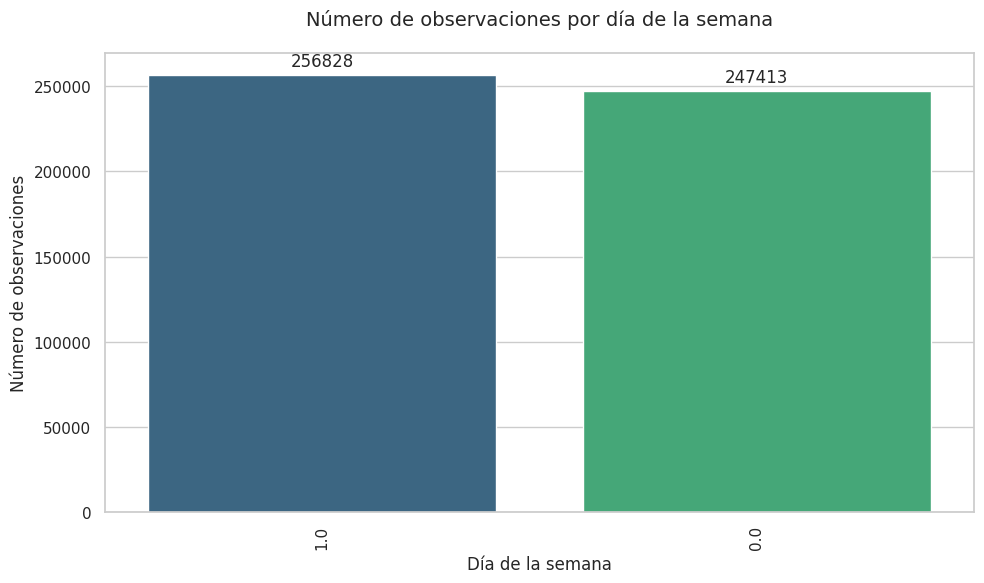

In [ ]:
# Configurar estilo visual (opcional)
sns.set(style="whitegrid")  # Fondo con cuadrícula
plt.figure(figsize=(10, 6))  # Tamaño del gráfico

# Crear gráfico de barras
ax = sns.countplot(
    data=df,
    x="urgenciamed",
    order=df["urgenciamed"].value_counts().index,  # Ordenar por frecuencia
    palette="viridis"  # Colores (puedes cambiar a "rocket", "mako", etc.)
)

# Personalizar ejes y título
plt.title("Número de observaciones por día de la semana", fontsize=14, pad=20)
plt.xlabel("Día de la semana", fontsize=12)
plt.ylabel("Número de observaciones", fontsize=12)

# Añadir etiquetas con los valores exactos
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 10),
        textcoords="offset points"
    )

# Rotar etiquetas del eje X si son largas (opcional)
plt.xticks(rotation=90)

# Mostrar gráfico
plt.tight_layout()  # Ajustar elementos para evitar cortes
plt.show()

In [ ]:
# Crear DataFrame con los datos
data = {
    "Código": ["002", "003", "004", "005", "006", "007", "008", "009", "010",
               "011", "012", "013", "014", "015", "016", "017"],
    "Alcaldía": ["AZCAPOTZALCO", "COYOACAN", "CUAJIMALPA DE MORELOS",
                "GUSTAVO A. MADERO", "IZTACALCO", "IZTAPALAPA",
                "LA MAGDALENA CONTRERAS", "MILPA ALTA", "ALVARO OBREGON",
                "TLAHUAC", "TLALPAN", "XOCHIMILCO", "BENITO JUAREZ",
                "CUAUHTEMOC", "MIGUEL HIDALGO", "VENUSTIANO CARRANZA"],
    "Población": [432205, 614447, 217686, 1173351, 404695, 1835486,
                 247622, 152685, 759137, 392313, 699928, 442178,
                 434153, 545884, 414470, 443704]
}
dfalc = pd.DataFrame(data)

# Guardar como CSV
dfalc.to_csv("poblacion_alcaldias_cdmx.csv", index=False, encoding='utf-8-sig')

print("Archivo CSV creado exitosamente!")
print(dfalc.head())

Archivo CSV creado exitosamente!
  Código               Alcaldía  Población
0    002           AZCAPOTZALCO     432205
1    003               COYOACAN     614447
2    004  CUAJIMALPA DE MORELOS     217686
3    005      GUSTAVO A. MADERO    1173351
4    006              IZTACALCO     404695


In [ ]:
# Hacer merge usando las columnas 'alcaldia_catalogo' (df) y 'Alcaldía' (dfalc)
df = pd.merge(
    df,
    dfalc[['Alcaldía', 'Población']],  # Seleccionar solo las columnas necesarias
    left_on='alcaldia_cierre',
    right_on='Alcaldía',
    how='left'  # Mantener todas las filas de df aunque no haya coincidencia
)

# Renombrar la columna resultante (opcional)
df.rename(columns={'Población': 'poblacion_alcaldia'}, inplace=True)
df

folio fecha_creacion dia_semana tipo_incidente_c4  \
0       C2C/20211229/00212     2021-12-29  Miércoles         Lesionado   
1       C2C/20211231/00183     2021-12-31    Viernes         Lesionado   
2       C2C/20220101/00012     2022-01-01     Sábado         Accidente   
3       C2C/20220101/00070     2022-01-01     Sábado         Accidente   
4       C2N/20211231/00128     2021-12-31    Viernes         Accidente   
...                    ...            ...        ...               ...   
504256   C5/20240229/04009     2024-02-29     Jueves         Accidente   
504257   C5/20240229/04038     2024-02-29     Jueves         Accidente   
504258   C5/20240229/04286     2024-02-29     Jueves         Accidente   
504259   C5/20240229/04300     2024-02-29     Jueves         Accidente   
504260   C5/20240229/04349     2024-02-29     Jueves         Accidente   

                 incidente_c4 alcaldia_inicio codigo_cierre  \
0                 Atropellado             NaN             I   
1                 Atropellado      CUAUHTEMOC             A   
2       Choque con lesionados      CUAUHTEMOC             A   
3                Motociclista      CUAUHTEMOC             A   
4       Choque sin lesionados       IZTACALCO             A   
...                       ...             ...           ...   
504256  Choque con lesionados      IZTAPALAPA             A   
504257  Choque con lesionados      CUAUHTEMOC             A   
504258  Choque con lesionados      IZTAPALAPA             D   
504259           Motociclista      IZTAPALAPA             F   
504260  Choque sin lesionados      IZTAPALAPA             A   

        clas_con_f_alarma      tipo_entrada alcaldia_cierre alcaldia_catalogo  \
0       URGENCIAS MEDICAS  BOTÓN DE AUXILIO             NaN        Cuauhtémoc   
1       URGENCIAS MEDICAS  BOTÓN DE AUXILIO      CUAUHTEMOC        Cuauhtémoc   
2       URGENCIAS MEDICAS  BOTÓN DE AUXILIO      CUAUHTEMOC        Cuauhtémoc   
3       URGENCIAS MEDICAS             RADIO      CUAUHTEMOC    Miguel Hidalgo   
4              EMERGENCIA  BOTÓN DE AUXILIO       IZTACALCO         Iztacalco   
...                   ...               ...             ...               ...   
504256  URGENCIAS MEDICAS   LLAMADA DEL 911      IZTAPALAPA        Iztapalapa   
504257  URGENCIAS MEDICAS             RADIO      CUAUHTEMOC        Cuauhtémoc   
504258  URGENCIAS MEDICAS   LLAMADA DEL 911      IZTAPALAPA        Iztapalapa   
504259  URGENCIAS MEDICAS   LLAMADA DEL 911      IZTAPALAPA        Iztapalapa   
504260         EMERGENCIA   LLAMADA DEL 911      IZTAPALAPA        Iztapalapa   

           colonia_catalogo   longitud    latitud fecha_hora_creacion  \
0                Roma Norte -99.163670  19.421610 2021-12-29 23:21:20   
1                    Obrera -99.144270  19.409910 2021-12-31 23:48:03   
2                  Doctores -99.148320  19.415250 2022-01-01 01:06:39   
3                  Tlaxpana -99.165781  19.443649 2022-01-01 09:51:53   
4        Agricola Pantitlan -99.060450  19.414620 2021-12-31 23:03:05   
...                     ...        ...        ...                 ...   
504256            El Vergel -99.087270  19.320600 2024-02-29 19:53:36   
504257               Centro -99.125200  19.428723 2024-02-29 20:01:42   
504258             Apatlaco -99.119881  19.380011 2024-02-29 20:43:20   
504259  Guadalupe Del Moral -99.080981  19.369412 2024-02-29 20:46:18   
504260         Juan Escutia -99.054112  19.397305 2024-02-29 20:53:56   

         fecha_hora_cierre  urgenciamed    Alcaldía  poblacion_alcaldia  
0      2022-01-01 00:24:06          1.0         NaN                 NaN  
1      2022-01-01 06:29:52          1.0  CUAUHTEMOC            545884.0  
2      2022-01-01 06:00:12          1.0  CUAUHTEMOC            545884.0  
3      2022-01-01 12:54:10          1.0  CUAUHTEMOC            545884.0  
4      2022-01-01 06:16:42          0.0   IZTACALCO            404695.0  
...                    ...          ...         ...                 ...  
504256 

In [ ]:
# Calcular el centro del mapa
map_center = [df['latitud'].mean(), df['longitud'].mean()]
m = folium.Map(location=map_center, zoom_start=12, tiles='OpenStreetMap')

# Agregar puntos con clustering para mejor rendimiento con muchos datos
marker_cluster = MarkerCluster().add_to(m)

# Añadir marcadores (muestra solo los primeros 1000 puntos por rendimiento)
for idx, row in df.head(1000).iterrows():
    folium.Marker(
        location=[row['latitud'], row['longitud']],
        popup=f"Incidente: {row['incidente_c4']}",
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(marker_cluster)

# Mostrar el mapa
m.save('mapa_incidentes.html')  # Guardar como HTML
m  # Para mostrar en Jupyter Notebook

cc

## Extracción de datos de humedad y precipitación

In [ ]:
# URL del archivo
url = "https://smn.conagua.gob.mx/tools/RESOURCES/Normales_Climatologicas/Diarios/df/dia09048.txt"

# Descargar el contenido
response = requests.get(url)
lines = response.text.split('\n')
start_line = 0
for i, line in enumerate(lines):
    if line.startswith("FECHA"):
        start_line = i + 2  # Saltar la línea de unidades (mm, °C)
        break

# Leer los datos en un DataFrame de pandas
data = []
for line in lines[start_line:]:
    if line.strip():  # Ignorar líneas vacías
        parts = line.split()
        if len(parts) >= 5:  # Asegurarse de que la línea tenga todas las columnas
            fecha = parts[0]
            precip = parts[1] if parts[1] != "NULO" else None  # Manejar valores nulos
            evap = parts[2] if parts[2] != "NULO" else None
            tmax = parts[3] if parts[3] != "NULO" else None
            tmin = parts[4] if parts[4] != "NULO" else None
            data.append([fecha, precip, evap, tmax, tmin])

# Crear DataFrame
df = pd.DataFrame(data, columns=["FECHA", "PRECIP", "EVAP", "TMAX", "TMIN"])

# Convertir columnas numéricas (excepto FECHA)
df["PRECIP"] = pd.to_numeric(df["PRECIP"], errors='coerce')  # 'coerce' convierte "NULO" a NaN
df["EVAP"] = pd.to_numeric(df["EVAP"], errors='coerce')
df["TMAX"] = pd.to_numeric(df["TMAX"], errors='coerce')
df["TMIN"] = pd.to_numeric(df["TMIN"], errors='coerce')

# Convertir FECHA a datetime
df["FECHA"] = pd.to_datetime(df["FECHA"])
df = df[df["FECHA"] >= "2022-01-01"]


# Mostrar las primeras filas
print(df.head())

# Guardar en CSV (opcional)
df.to_csv("datos_climaticos_tacubaya.csv", index=False)


           FECHA  PRECIP  EVAP  TMAX  TMIN
52806 2022-01-01    18.6   NaN  25.5  10.0
52807 2022-01-02     0.0  6.22  25.9   9.5
52808 2022-01-03     0.0  1.90  22.0  10.0
52809 2022-01-04     0.0  0.84  26.1   8.8
52810 2022-01-05     0.0  5.76  25.5   9.4


In [ ]:
# URL del archivo
url = "https://smn.conagua.gob.mx/tools/RESOURCES/Normales_Climatologicas/Diarios/df/dia09010.txt"

# Descargar el contenido
response = requests.get(url)
lines = response.text.split('\n')

# Encontrar la línea donde empiezan los datos (después de los encabezados)
start_line = 0
for i, line in enumerate(lines):
    if line.startswith("FECHA"):
        start_line = i + 2  # Saltar la línea de unidades (mm, °C)
        break

# Leer los datos en un DataFrame de pandas
data = []
for line in lines[start_line:]:
    if line.strip():  # Ignorar líneas vacías
        parts = line.split()
        if len(parts) >= 5:  # Asegurarse de que la línea tenga todas las columnas
            fecha = parts[0]
            precip = parts[1] if parts[1] != "NULO" else None  # Manejar valores nulos
            evap = parts[2] if parts[2] != "NULO" else None
            tmax = parts[3] if parts[3] != "NULO" else None
            tmin = parts[4] if parts[4] != "NULO" else None
            data.append([fecha, precip, evap, tmax, tmin])

# Crear DataFrame
df = pd.DataFrame(data, columns=["FECHA", "PRECIP", "EVAP", "TMAX", "TMIN"])

# Convertir columnas numéricas (excepto FECHA)
df["PRECIP"] = pd.to_numeric(df["PRECIP"], errors='coerce')  # 'coerce' convierte "NULO" a NaN
df["EVAP"] = pd.to_numeric(df["EVAP"], errors='coerce')
df["TMAX"] = pd.to_numeric(df["TMAX"], errors='coerce')
df["TMIN"] = pd.to_numeric(df["TMIN"], errors='coerce')


# Convertir FECHA a datetime
df["FECHA"] = pd.to_datetime(df["FECHA"])
df = df[df["FECHA"] >= "2022-01-01"]

# Mostrar las primeras filas
print(df.head())

# Guardar en CSV (opcional)
df.to_csv("datos_climaticos_america.csv", index=False)

           FECHA  PRECIP  EVAP  TMAX  TMIN
16050 2022-01-01     0.0   NaN  26.0   3.0
16051 2022-01-02     0.0   NaN  23.0   3.0
16052 2022-01-03     0.0   NaN  25.0   3.0
16053 2022-01-04     0.0   NaN  24.0   3.0
16054 2022-01-05     0.0   NaN  24.0   3.0


In [ ]:
# URL del archivo
url = "https://smn.conagua.gob.mx/tools/RESOURCES/Normales_Climatologicas/Diarios/df/dia09036.txt"

# Descargar el contenido
response = requests.get(url)
lines = response.text.split('\n')

# Encontrar la línea donde empiezan los datos (después de los encabezados)
start_line = 0
for i, line in enumerate(lines):
    if line.startswith("FECHA"):
        start_line = i + 2  # Saltar la línea de unidades (mm, °C)
        break

# Leer los datos en un DataFrame de pandas
data = []
for line in lines[start_line:]:
    if line.strip():  # Ignorar líneas vacías
        parts = line.split()
        if len(parts) >= 5:  # Asegurarse de que la línea tenga todas las columnas
            fecha = parts[0]
            precip = parts[1] if parts[1] != "NULO" else None  # Manejar valores nulos
            evap = parts[2] if parts[2] != "NULO" else None
            tmax = parts[3] if parts[3] != "NULO" else None
            tmin = parts[4] if parts[4] != "NULO" else None
            data.append([fecha, precip, evap, tmax, tmin])

# Crear DataFrame
df = pd.DataFrame(data, columns=["FECHA", "PRECIP", "EVAP", "TMAX", "TMIN"])

# Convertir columnas numéricas (excepto FECHA)
df["PRECIP"] = pd.to_numeric(df["PRECIP"], errors='coerce')  # 'coerce' convierte "NULO" a NaN
df["EVAP"] = pd.to_numeric(df["EVAP"], errors='coerce')
df["TMAX"] = pd.to_numeric(df["TMAX"], errors='coerce')
df["TMIN"] = pd.to_numeric(df["TMIN"], errors='coerce')

# Convertir FECHA a datetime
df["FECHA"] = pd.to_datetime(df["FECHA"])
df = df[df["FECHA"] >= "2022-01-01"]

# Mostrar las primeras filas
print(df.head())

# Guardar en CSV (opcional)
df.to_csv("datos_climaticos_iztacalco.csv", index=False)

           FECHA  PRECIP  EVAP  TMAX  TMIN
19191 2022-01-01     0.0   NaN  23.0   7.0
19192 2022-01-02     0.0   NaN  23.0   7.0
19193 2022-01-03     0.0   NaN  24.0   7.0
19194 2022-01-04     0.0   NaN  25.0   8.0
19195 2022-01-05     0.0   NaN  22.0   9.0


In [ ]:
# URL del archivo
url = "https://smn.conagua.gob.mx/tools/RESOURCES/Normales_Climatologicas/Diarios/df/dia09014.txt"

# Descargar el contenido
response = requests.get(url)
lines = response.text.split('\n')

# Encontrar la línea donde empiezan los datos (después de los encabezados)
start_line = 0
for i, line in enumerate(lines):
    if line.startswith("FECHA"):
        start_line = i + 2  # Saltar la línea de unidades (mm, °C)
        break

# Leer los datos en un DataFrame de pandas
data = []
for line in lines[start_line:]:
    if line.strip():  # Ignorar líneas vacías
        parts = line.split()
        if len(parts) >= 5:  # Asegurarse de que la línea tenga todas las columnas
            fecha = parts[0]
            precip = parts[1] if parts[1] != "NULO" else None  # Manejar valores nulos
            evap = parts[2] if parts[2] != "NULO" else None
            tmax = parts[3] if parts[3] != "NULO" else None
            tmin = parts[4] if parts[4] != "NULO" else None
            data.append([fecha, precip, evap, tmax, tmin])

# Crear DataFrame
df = pd.DataFrame(data, columns=["FECHA", "PRECIP", "EVAP", "TMAX", "TMIN"])

# Convertir columnas numéricas (excepto FECHA)
df["PRECIP"] = pd.to_numeric(df["PRECIP"], errors='coerce')  # 'coerce' convierte "NULO" a NaN
df["EVAP"] = pd.to_numeric(df["EVAP"], errors='coerce')
df["TMAX"] = pd.to_numeric(df["TMAX"], errors='coerce')
df["TMIN"] = pd.to_numeric(df["TMIN"], errors='coerce')

# Convertir FECHA a datetime
df["FECHA"] = pd.to_datetime(df["FECHA"])
df = df[df["FECHA"] >= "2022-01-01"]

# Mostrar las primeras filas
print(df.head())

# Guardar en CSV (opcional)
df.to_csv("datos_climaticos_santaursula.csv", index=False)

           FECHA  PRECIP  EVAP  TMAX  TMIN
18048 2022-01-01     0.0   NaN  23.0   7.0
18049 2022-01-02     0.0   NaN  23.0   6.5
18050 2022-01-03     0.0   NaN  21.0   6.0
18051 2022-01-04     0.0   NaN  23.0   7.0
18052 2022-01-05     0.0   NaN  21.5   6.0


In [ ]:
# URL del archivo
url = "https://smn.conagua.gob.mx/tools/RESOURCES/Normales_Climatologicas/Diarios/df/dia09071.txt"

# Descargar el contenido
response = requests.get(url)
lines = response.text.split('\n')

# Encontrar la línea donde empiezan los datos (después de los encabezados)
start_line = 0
for i, line in enumerate(lines):
    if line.startswith("FECHA"):
        start_line = i + 2  # Saltar la línea de unidades (mm, °C)
        break

# Leer los datos en un DataFrame de pandas
data = []
for line in lines[start_line:]:
    if line.strip():  # Ignorar líneas vacías
        parts = line.split()
        if len(parts) >= 5:  # Asegurarse de que la línea tenga todas las columnas
            fecha = parts[0]
            precip = parts[1] if parts[1] != "NULO" else None  # Manejar valores nulos
            evap = parts[2] if parts[2] != "NULO" else None
            tmax = parts[3] if parts[3] != "NULO" else None
            tmin = parts[4] if parts[4] != "NULO" else None
            data.append([fecha, precip, evap, tmax, tmin])

# Crear DataFrame
df = pd.DataFrame(data, columns=["FECHA", "PRECIP", "EVAP", "TMAX", "TMIN"])

# Convertir columnas numéricas (excepto FECHA)
df["PRECIP"] = pd.to_numeric(df["PRECIP"], errors='coerce')  # 'coerce' convierte "NULO" a NaN
df["EVAP"] = pd.to_numeric(df["EVAP"], errors='coerce')
df["TMAX"] = pd.to_numeric(df["TMAX"], errors='coerce')
df["TMIN"] = pd.to_numeric(df["TMIN"], errors='coerce')

# Convertir FECHA a datetime
df["FECHA"] = pd.to_datetime(df["FECHA"])
df = df[df["FECHA"] >= "2022-01-01"]

# Mostrar las primeras filas
print(df.head())

# Guardar en CSV (opcional)
df.to_csv("datos_climaticos_coyoacan.csv", index=False)

           FECHA  PRECIP  EVAP  TMAX  TMIN
14176 2022-01-01     0.0   NaN  26.0   7.0
14177 2022-01-02     0.0   NaN  26.0   7.0
14178 2022-01-03     0.0   NaN  25.0   7.0
14179 2022-01-04     0.0   NaN  25.0   8.0
14180 2022-01-05     0.0   NaN  24.0   8.0


In [ ]:
# URL del archivo
url = "https://smn.conagua.gob.mx/tools/RESOURCES/Normales_Climatologicas/Diarios/df/dia09043.txt"

# Descargar el contenido
response = requests.get(url)
lines = response.text.split('\n')

# Encontrar la línea donde empiezan los datos (después de los encabezados)
start_line = 0
for i, line in enumerate(lines):
    if line.startswith("FECHA"):
        start_line = i + 2  # Saltar la línea de unidades (mm, °C)
        break

# Leer los datos en un DataFrame de pandas
data = []
for line in lines[start_line:]:
    if line.strip():  # Ignorar líneas vacías
        parts = line.split()
        if len(parts) >= 5:  # Asegurarse de que la línea tenga todas las columnas
            fecha = parts[0]
            precip = parts[1] if parts[1] != "NULO" else None  # Manejar valores nulos
            evap = parts[2] if parts[2] != "NULO" else None
            tmax = parts[3] if parts[3] != "NULO" else None
            tmin = parts[4] if parts[4] != "NULO" else None
            data.append([fecha, precip, evap, tmax, tmin])

# Crear DataFrame
df = pd.DataFrame(data, columns=["FECHA", "PRECIP", "EVAP", "TMAX", "TMIN"])

# Convertir columnas numéricas (excepto FECHA)
df["PRECIP"] = pd.to_numeric(df["PRECIP"], errors='coerce')  # 'coerce' convierte "NULO" a NaN
df["EVAP"] = pd.to_numeric(df["EVAP"], errors='coerce')
df["TMAX"] = pd.to_numeric(df["TMAX"], errors='coerce')
df["TMIN"] = pd.to_numeric(df["TMIN"], errors='coerce')

# Convertir FECHA a datetime
df["FECHA"] = pd.to_datetime(df["FECHA"])
df = df[df["FECHA"] >= "2022-01-01"]

# Mostrar las primeras filas
print(df.head())

# Guardar en CSV (opcional)
df.to_csv("datos_climaticos_gam.csv", index=False)

           FECHA  PRECIP  EVAP  TMAX  TMIN
24888 2022-01-01     0.0  2.68  26.0   6.0
24889 2022-01-02     0.0  3.00  27.0   5.0
24890 2022-01-03     0.0  1.72  23.0   9.0
24891 2022-01-04     0.0  2.70  27.0   5.5
24892 2022-01-05     0.0  1.10  27.5   7.0


In [ ]:
# URL del archivo
url = "https://smn.conagua.gob.mx/tools/RESOURCES/Normales_Climatologicas/Diarios/mex/dia15058.txt"

# Descargar el contenido
response = requests.get(url)
lines = response.text.split('\n')

# Encontrar la línea donde empiezan los datos (después de los encabezados)
start_line = 0
for i, line in enumerate(lines):
    if line.startswith("FECHA"):
        start_line = i + 2  # Saltar la línea de unidades (mm, °C)
        break

# Leer los datos en un DataFrame de pandas
data = []
for line in lines[start_line:]:
    if line.strip():  # Ignorar líneas vacías
        parts = line.split()
        if len(parts) >= 5:  # Asegurarse de que la línea tenga todas las columnas
            fecha = parts[0]
            precip = parts[1] if parts[1] != "NULO" else None  # Manejar valores nulos
            evap = parts[2] if parts[2] != "NULO" else None
            tmax = parts[3] if parts[3] != "NULO" else None
            tmin = parts[4] if parts[4] != "NULO" else None
            data.append([fecha, precip, evap, tmax, tmin])

# Crear DataFrame
df = pd.DataFrame(data, columns=["FECHA", "PRECIP", "EVAP", "TMAX", "TMIN"])

# Convertir columnas numéricas (excepto FECHA)
df["PRECIP"] = pd.to_numeric(df["PRECIP"], errors='coerce')  # 'coerce' convierte "NULO" a NaN
df["EVAP"] = pd.to_numeric(df["EVAP"], errors='coerce')
df["TMAX"] = pd.to_numeric(df["TMAX"], errors='coerce')
df["TMIN"] = pd.to_numeric(df["TMIN"], errors='coerce')

# Convertir FECHA a datetime
df["FECHA"] = pd.to_datetime(df["FECHA"])
df = df[df["FECHA"] >= "2022-01-01"]

# Mostrar las primeras filas
print(df.head())

# Guardar en CSV (opcional)
df.to_csv("datos_climaticos_naucalpan.csv", index=False)

           FECHA  PRECIP  EVAP  TMAX  TMIN
19035 2022-01-01     0.0  3.45  29.0   0.0
19036 2022-01-02     0.0  4.90  28.0   0.0
19037 2022-01-03     0.0  2.11  27.0   0.0
19038 2022-01-04     0.0  2.53  26.0   0.0
19039 2022-01-05     0.0  4.48  25.0   0.0


In [ ]:
# URL del archivo
url = "https://smn.conagua.gob.mx/tools/RESOURCES/Normales_Climatologicas/Diarios/df/dia09020.txt"

# Descargar el contenido
response = requests.get(url)
lines = response.text.split('\n')

# Encontrar la línea donde empiezan los datos (después de los encabezados)
start_line = 0
for i, line in enumerate(lines):
    if line.startswith("FECHA"):
        start_line = i + 2  # Saltar la línea de unidades (mm, °C)
        break

# Leer los datos en un DataFrame de pandas
data = []
for line in lines[start_line:]:
    if line.strip():  # Ignorar líneas vacías
        parts = line.split()
        if len(parts) >= 5:  # Asegurarse de que la línea tenga todas las columnas
            fecha = parts[0]
            precip = parts[1] if parts[1] != "NULO" else None  # Manejar valores nulos
            evap = parts[2] if parts[2] != "NULO" else None
            tmax = parts[3] if parts[3] != "NULO" else None
            tmin = parts[4] if parts[4] != "NULO" else None
            data.append([fecha, precip, evap, tmax, tmin])

# Crear DataFrame
df = pd.DataFrame(data, columns=["FECHA", "PRECIP", "EVAP", "TMAX", "TMIN"])

# Convertir columnas numéricas (excepto FECHA)
df["PRECIP"] = pd.to_numeric(df["PRECIP"], errors='coerce')  # 'coerce' convierte "NULO" a NaN
df["EVAP"] = pd.to_numeric(df["EVAP"], errors='coerce')
df["TMAX"] = pd.to_numeric(df["TMAX"], errors='coerce')
df["TMIN"] = pd.to_numeric(df["TMIN"], errors='coerce')

# Convertir FECHA a datetime
df["FECHA"] = pd.to_datetime(df["FECHA"])
df = df[df["FECHA"] >= "2022-01-01"]

# Mostrar las primeras filas
print(df.head())

# Guardar en CSV (opcional)
df.to_csv("datos_climaticos_pedregal.csv", index=False)

           FECHA  PRECIP  EVAP  TMAX  TMIN
24940 2022-01-01     0.0   3.1  24.0   9.0
24941 2022-01-02     0.0   2.5  23.0  10.0
24942 2022-01-03     0.0   3.1  24.0   9.0
24943 2022-01-04     0.0   2.6  23.0  10.0
24944 2022-01-05     0.0   3.1  24.0  10.0


In [ ]:
# URL del archivo
url = "https://smn.conagua.gob.mx/tools/RESOURCES/Normales_Climatologicas/Diarios/df/dia09004.txt"

# Descargar el contenido
response = requests.get(url)
lines = response.text.split('\n')

# Encontrar la línea donde empiezan los datos (después de los encabezados)
start_line = 0
for i, line in enumerate(lines):
    if line.startswith("FECHA"):
        start_line = i + 2  # Saltar la línea de unidades (mm, °C)
        break

# Leer los datos en un DataFrame de pandas
data = []
for line in lines[start_line:]:
    if line.strip():  # Ignorar líneas vacías
        parts = line.split()
        if len(parts) >= 5:  # Asegurarse de que la línea tenga todas las columnas
            fecha = parts[0]
            precip = parts[1] if parts[1] != "NULO" else None  # Manejar valores nulos
            evap = parts[2] if parts[2] != "NULO" else None
            tmax = parts[3] if parts[3] != "NULO" else None
            tmin = parts[4] if parts[4] != "NULO" else None
            data.append([fecha, precip, evap, tmax, tmin])

# Crear DataFrame
df = pd.DataFrame(data, columns=["FECHA", "PRECIP", "EVAP", "TMAX", "TMIN"])

# Convertir columnas numéricas (excepto FECHA)
df["PRECIP"] = pd.to_numeric(df["PRECIP"], errors='coerce')  # 'coerce' convierte "NULO" a NaN
df["EVAP"] = pd.to_numeric(df["EVAP"], errors='coerce')
df["TMAX"] = pd.to_numeric(df["TMAX"], errors='coerce')
df["TMIN"] = pd.to_numeric(df["TMIN"], errors='coerce')

# Convertir FECHA a datetime
df["FECHA"] = pd.to_datetime(df["FECHA"])
df = df[df["FECHA"] >= "2022-01-01"]

# Mostrar las primeras filas
print(df.head())

# Guardar en CSV (opcional)
df.to_csv("datos_climaticos_tlalpan.csv", index=False)

           FECHA  PRECIP  EVAP  TMAX  TMIN
18332 2022-01-01     0.0   NaN  25.0   9.0
18333 2022-01-02    10.0   NaN  22.0   9.0
18334 2022-01-03     0.0   NaN  23.0  10.0
18335 2022-01-04     0.0   NaN  25.0   9.0
18336 2022-01-05     0.0   NaN  26.0   8.0


In [ ]:
# URL del archivo
url = "https://smn.conagua.gob.mx/tools/RESOURCES/Normales_Climatologicas/Diarios/df/dia09051.txt"

# Descargar el contenido
response = requests.get(url)
lines = response.text.split('\n')

# Encontrar la línea donde empiezan los datos (después de los encabezados)
start_line = 0
for i, line in enumerate(lines):
    if line.startswith("FECHA"):
        start_line = i + 2  # Saltar la línea de unidades (mm, °C)
        break

# Leer los datos en un DataFrame de pandas
data = []
for line in lines[start_line:]:
    if line.strip():  # Ignorar líneas vacías
        parts = line.split()
        if len(parts) >= 5:  # Asegurarse de que la línea tenga todas las columnas
            fecha = parts[0]
            precip = parts[1] if parts[1] != "NULO" else None  # Manejar valores nulos
            evap = parts[2] if parts[2] != "NULO" else None
            tmax = parts[3] if parts[3] != "NULO" else None
            tmin = parts[4] if parts[4] != "NULO" else None
            data.append([fecha, precip, evap, tmax, tmin])

# Crear DataFrame
df = pd.DataFrame(data, columns=["FECHA", "PRECIP", "EVAP", "TMAX", "TMIN"])

# Convertir columnas numéricas (excepto FECHA)
df["PRECIP"] = pd.to_numeric(df["PRECIP"], errors='coerce')  # 'coerce' convierte "NULO" a NaN
df["EVAP"] = pd.to_numeric(df["EVAP"], errors='coerce')
df["TMAX"] = pd.to_numeric(df["TMAX"], errors='coerce')
df["TMIN"] = pd.to_numeric(df["TMIN"], errors='coerce')

# Convertir FECHA a datetime
df["FECHA"] = pd.to_datetime(df["FECHA"])
df = df[df["FECHA"] >= "2022-01-01"]

# Mostrar las primeras filas
print(df.head())

# Guardar en CSV (opcional)
df.to_csv("datos_climaticos_tlahuac.csv", index=False)

           FECHA  PRECIP  EVAP  TMAX  TMIN
19081 2022-01-01     0.0  1.81  10.0   5.0
19082 2022-01-02     0.0  0.23  14.0   2.0
19083 2022-01-03     0.0  1.26  12.0  10.0
19084 2022-01-04     0.0  1.51  10.0   5.0
19085 2022-01-05     0.0  0.13  10.0   2.0


In [ ]:
# URL del archivo
url = "https://smn.conagua.gob.mx/tools/RESOURCES/Normales_Climatologicas/Diarios/df/dia09029.txt"

# Descargar el contenido
response = requests.get(url)
lines = response.text.split('\n')

# Encontrar la línea donde empiezan los datos (después de los encabezados)
start_line = 0
for i, line in enumerate(lines):
    if line.startswith("FECHA"):
        start_line = i + 2  # Saltar la línea de unidades (mm, °C)
        break

# Leer los datos en un DataFrame de pandas
data = []
for line in lines[start_line:]:
    if line.strip():  # Ignorar líneas vacías
        parts = line.split()
        if len(parts) >= 5:  # Asegurarse de que la línea tenga todas las columnas
            fecha = parts[0]
            precip = parts[1] if parts[1] != "NULO" else None  # Manejar valores nulos
            evap = parts[2] if parts[2] != "NULO" else None
            tmax = parts[3] if parts[3] != "NULO" else None
            tmin = parts[4] if parts[4] != "NULO" else None
            data.append([fecha, precip, evap, tmax, tmin])

# Crear DataFrame
df = pd.DataFrame(data, columns=["FECHA", "PRECIP", "EVAP", "TMAX", "TMIN"])

# Convertir columnas numéricas (excepto FECHA)
df["PRECIP"] = pd.to_numeric(df["PRECIP"], errors='coerce')  # 'coerce' convierte "NULO" a NaN
df["EVAP"] = pd.to_numeric(df["EVAP"], errors='coerce')
df["TMAX"] = pd.to_numeric(df["TMAX"], errors='coerce')
df["TMIN"] = pd.to_numeric(df["TMIN"], errors='coerce')

# Convertir FECHA a datetime
df["FECHA"] = pd.to_datetime(df["FECHA"])
df = df[df["FECHA"] >= "2022-01-01"]

# Mostrar las primeras filas
print(df.head())

# Guardar en CSV (opcional)
df.to_csv("datos_climaticos_grancanal.csv", index=False)

           FECHA  PRECIP   EVAP  TMAX  TMIN
25212 2022-01-01     0.0   2.60  25.0   4.0
25213 2022-01-02     0.0  17.50  24.0   4.0
25214 2022-01-03     0.0   0.75  21.0   4.0
25215 2022-01-04     0.0   2.55  24.0   4.0
25216 2022-01-05     0.0   3.22  26.0   4.0


In [ ]:
# URL del archivo
url = "https://smn.conagua.gob.mx/tools/RESOURCES/Normales_Climatologicas/Diarios/df/dia09068.txt"

# Descargar el contenido
response = requests.get(url)
lines = response.text.split('\n')

# Encontrar la línea donde empiezan los datos (después de los encabezados)
start_line = 0
for i, line in enumerate(lines):
    if line.startswith("FECHA"):
        start_line = i + 2  # Saltar la línea de unidades (mm, °C)
        break

# Leer los datos en un DataFrame de pandas
data = []
for line in lines[start_line:]:
    if line.strip():  # Ignorar líneas vacías
        parts = line.split()
        if len(parts) >= 5:  # Asegurarse de que la línea tenga todas las columnas
            fecha = parts[0]
            precip = parts[1] if parts[1] != "NULO" else None  # Manejar valores nulos
            evap = parts[2] if parts[2] != "NULO" else None
            tmax = parts[3] if parts[3] != "NULO" else None
            tmin = parts[4] if parts[4] != "NULO" else None
            data.append([fecha, precip, evap, tmax, tmin])

# Crear DataFrame
df = pd.DataFrame(data, columns=["FECHA", "PRECIP", "EVAP", "TMAX", "TMIN"])

# Convertir columnas numéricas (excepto FECHA)
df["PRECIP"] = pd.to_numeric(df["PRECIP"], errors='coerce')  # 'coerce' convierte "NULO" a NaN
df["EVAP"] = pd.to_numeric(df["EVAP"], errors='coerce')
df["TMAX"] = pd.to_numeric(df["TMAX"], errors='coerce')
df["TMIN"] = pd.to_numeric(df["TMIN"], errors='coerce')

# Convertir FECHA a datetime
df["FECHA"] = pd.to_datetime(df["FECHA"])
df = df[df["FECHA"] >= "2022-01-01"]

# Mostrar las primeras filas
print(df.head())

# Guardar en CSV (opcional)
df.to_csv("datos_climaticos_cuahutemoc.csv", index=False)

           FECHA  PRECIP  EVAP  TMAX  TMIN
16082 2022-01-01     0.0   NaN  24.5   3.0
16083 2022-01-02     0.0   NaN  21.0   2.0
16084 2022-01-03     0.0   NaN  21.5   4.0
16085 2022-01-04     0.0   NaN  21.0   2.0
16086 2022-01-05     0.0   NaN  15.0   3.0


In [ ]:
# URL del archivo
url = "https://smn.conagua.gob.mx/tools/RESOURCES/Normales_Climatologicas/Diarios/df/dia09032.txt"

# Descargar el contenido
response = requests.get(url)
lines = response.text.split('\n')

# Encontrar la línea donde empiezan los datos (después de los encabezados)
start_line = 0
for i, line in enumerate(lines):
    if line.startswith("FECHA"):
        start_line = i + 2  # Saltar la línea de unidades (mm, °C)
        break

# Leer los datos en un DataFrame de pandas
data = []
for line in lines[start_line:]:
    if line.strip():  # Ignorar líneas vacías
        parts = line.split()
        if len(parts) >= 5:  # Asegurarse de que la línea tenga todas las columnas
            fecha = parts[0]
            precip = parts[1] if parts[1] != "NULO" else None  # Manejar valores nulos
            evap = parts[2] if parts[2] != "NULO" else None
            tmax = parts[3] if parts[3] != "NULO" else None
            tmin = parts[4] if parts[4] != "NULO" else None
            data.append([fecha, precip, evap, tmax, tmin])

# Crear DataFrame
df = pd.DataFrame(data, columns=["FECHA", "PRECIP", "EVAP", "TMAX", "TMIN"])

# Convertir columnas numéricas (excepto FECHA)
df["PRECIP"] = pd.to_numeric(df["PRECIP"], errors='coerce')  # 'coerce' convierte "NULO" a NaN
df["EVAP"] = pd.to_numeric(df["EVAP"], errors='coerce')
df["TMAX"] = pd.to_numeric(df["TMAX"], errors='coerce')
df["TMIN"] = pd.to_numeric(df["TMIN"], errors='coerce')

# Convertir FECHA a datetime
df["FECHA"] = pd.to_datetime(df["FECHA"])
df = df[df["FECHA"] >= "2022-01-01"]

# Mostrar las primeras filas
print(df.head())

# Guardar en CSV (opcional)
df.to_csv("datos_climaticos_milpaalta.csv", index=False)

           FECHA  PRECIP  EVAP  TMAX  TMIN
25792 2022-01-01     0.0   NaN  17.0   3.0
25793 2022-01-02     0.0   NaN  17.0   3.0
25794 2022-01-03     0.0   NaN  17.0   3.0
25795 2022-01-04     0.0   NaN  17.0   3.0
25796 2022-01-05     0.0   NaN  16.0   3.0


## Extracción de datos de Metrobús


In [ ]:
# Leer el archivo CSV
df_metrobus = pd.read_csv('/content/afluenciamb_simple_03_2025.csv')
# Opción 1: Capitalizar y corregir la tilde (recomendado)
df_metrobus['linea'] = df_metrobus['linea'].str.replace('linea', 'Línea', case=False)

# Opción 2: Si hay otras variaciones (ej. "LINEA 1", "Linea 2"), normalizar todo
df_metrobus['linea'] = (
    df_metrobus['linea'].str.lower()           # Convertir todo a minúscula
               .str.replace('linea', 'Línea')  # Reemplazar 'linea' por 'Línea'
)

# Pivotar el DataFrame para tener columnas por línea
df_pivoted = df_metrobus.pivot(index=['fecha', 'anio', 'mes'], columns='linea', values='afluencia')

# Resetear el índice para convertir las columnas de índice en columnas normales
df_pivoted = df_pivoted.reset_index()
# Suponiendo que ya tienes tu DataFrame df_pivoted

# Renombrar las columnas para quitar el nombre 'linea' del multiíndice
df_pivoted.columns.name = None

df_pivoted['fecha'] = pd.to_datetime(df_pivoted['fecha'])
df_pivoted = df_pivoted[df_pivoted["fecha"] >= "2022-01-01"]

# Mostrar el resultado
df_pivoted

fecha  anio    mes   línea 1   línea 2   línea 3   línea 4  \
6003 2022-01-01  2022  Enero   80808.0   44817.0   43627.0   22813.0   
6004 2022-01-02  2022  Enero  119205.0   64174.0   64012.0   44968.0   
6005 2022-01-03  2022  Enero  286386.0  138192.0  119252.0   78351.0   
6006 2022-01-04  2022  Enero  306844.0  148804.0  126552.0   78763.0   
6007 2022-01-05  2022  Enero  313958.0  147356.0  133076.0   71695.0   
...         ...   ...    ...       ...       ...       ...       ...   
7184 2025-03-27  2025  Marzo  506029.0  232203.0  206659.0  106505.0   
7185 2025-03-28  2025  Marzo  522377.0  237966.0  201094.0  111985.0   
7186 2025-03-29  2025  Marzo  359219.0  156967.0  143114.0   97642.0   
7187 2025-03-30  2025  Marzo  227083.0  105315.0  103119.0   52642.0   
7188 2025-03-31  2025  Marzo  483498.0  241685.0  193265.0   89238.0   

       línea 5   línea 6   línea 7  
6003   69499.0   51922.0   51098.0  
6004  100925.0   66220.0   71395.0  
6005  178251.0  132523.0  118881.0  
6006  189064.0  147068.0  122574.0  
6007  191854.0  150685.0  124660.0  
...        ...       ...       ...  
7184  298929.0  215773.0  170185.0  
7185  268636.0  198952.0  166328.0  
7186  183537.0  135681.0  108347.0  
7187  157095.0   96057.0   65197.0  
7188  279199.0  200687.0  149334.0  

[1186 rows x 10 columns]

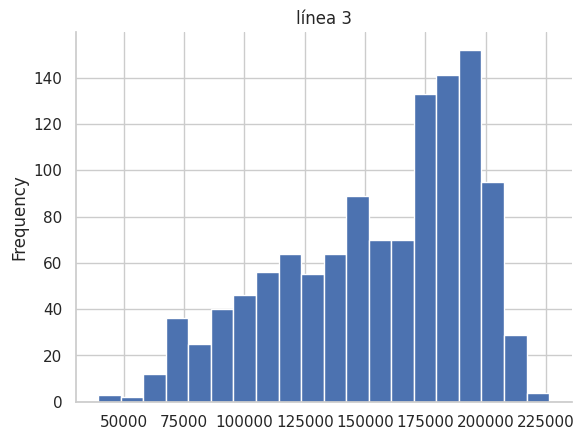

In [ ]:
from matplotlib import pyplot as plt
df_pivoted['línea 3'].plot(kind='hist', bins=20, title='línea 3')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# 1. Información general del dataframe
print("\nInformación general del dataframe:")
df_pivoted['fecha'] = pd.to_datetime(df_pivoted['fecha'])
df_pivoted = df_pivoted[df_pivoted["fecha"] >= "2022-01-01"]
df_pivoted


Información general del dataframe:


fecha  anio    mes   línea 1   línea 2   línea 3   línea 4  \
6003 2022-01-01  2022  Enero   80808.0   44817.0   43627.0   22813.0   
6004 2022-01-02  2022  Enero  119205.0   64174.0   64012.0   44968.0   
6005 2022-01-03  2022  Enero  286386.0  138192.0  119252.0   78351.0   
6006 2022-01-04  2022  Enero  306844.0  148804.0  126552.0   78763.0   
6007 2022-01-05  2022  Enero  313958.0  147356.0  133076.0   71695.0   
...         ...   ...    ...       ...       ...       ...       ...   
7184 2025-03-27  2025  Marzo  506029.0  232203.0  206659.0  106505.0   
7185 2025-03-28  2025  Marzo  522377.0  237966.0  201094.0  111985.0   
7186 2025-03-29  2025  Marzo  359219.0  156967.0  143114.0   97642.0   
7187 2025-03-30  2025  Marzo  227083.0  105315.0  103119.0   52642.0   
7188 2025-03-31  2025  Marzo  483498.0  241685.0  193265.0   89238.0   

       línea 5   línea 6   línea 7  
6003   69499.0   51922.0   51098.0  
6004  100925.0   66220.0   71395.0  
6005  178251.0  132523.0  118881.0  
6006  189064.0  147068.0  122574.0  
6007  191854.0  150685.0  124660.0  
...        ...       ...       ...  
7184  298929.0  215773.0  170185.0  
7185  268636.0  198952.0  166328.0  
7186  183537.0  135681.0  108347.0  
7187  157095.0   96057.0   65197.0  
7188  279199.0  200687.0  149334.0  

[1186 rows x 10 columns]

In [ ]:
print("\nInformación general del dataframe:")
print(df_pivoted.info())


Información general del dataframe:
<class 'pandas.core.frame.DataFrame'>
Index: 1186 entries, 6003 to 7188
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   fecha    1186 non-null   datetime64[ns]
 1   anio     1186 non-null   int64         
 2   mes      1186 non-null   object        
 3   línea 1  1186 non-null   float64       
 4   línea 2  1186 non-null   float64       
 5   línea 3  1186 non-null   float64       
 6   línea 4  1186 non-null   float64       
 7   línea 5  1186 non-null   float64       
 8   línea 6  1186 non-null   float64       
 9   línea 7  1186 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 101.9+ KB
None


In [ ]:

# Unir con df
df = pd.merge(
    df,
    df_pivoted,
    left_on='fecha_creacion',
    right_on='fecha',
    how='left'
)

In [ ]:
print("\nInformación general del dataframe:")
print(df.info())


Información general del dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504261 entries, 0 to 504260
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   folio                504261 non-null  object        
 1   fecha_creacion       504261 non-null  datetime64[ns]
 2   dia_semana           504261 non-null  category      
 3   tipo_incidente_c4    504261 non-null  category      
 4   incidente_c4         504261 non-null  category      
 5   alcaldia_inicio      504226 non-null  category      
 6   codigo_cierre        504261 non-null  object        
 7   clas_con_f_alarma    504261 non-null  category      
 8   tipo_entrada         504256 non-null  category      
 9   alcaldia_cierre      504226 non-null  object        
 10  alcaldia_catalogo    503707 non-null  category      
 11  colonia_catalogo     493085 non-null  category      
 12  longitud             504261 non-null

In [ ]:
df

folio fecha_creacion dia_semana tipo_incidente_c4  \
0       C2C/20211229/00212     2021-12-29  Miércoles         Lesionado   
1       C2C/20211231/00183     2021-12-31    Viernes         Lesionado   
2       C2C/20220101/00012     2022-01-01     Sábado         Accidente   
3       C2C/20220101/00070     2022-01-01     Sábado         Accidente   
4       C2N/20211231/00128     2021-12-31    Viernes         Accidente   
...                    ...            ...        ...               ...   
504256   C5/20240229/04009     2024-02-29     Jueves         Accidente   
504257   C5/20240229/04038     2024-02-29     Jueves         Accidente   
504258   C5/20240229/04286     2024-02-29     Jueves         Accidente   
504259   C5/20240229/04300     2024-02-29     Jueves         Accidente   
504260   C5/20240229/04349     2024-02-29     Jueves         Accidente   

                 incidente_c4 alcaldia_inicio codigo_cierre  \
0                 Atropellado             NaN             I   
1                 Atropellado      CUAUHTEMOC             A   
2       Choque con lesionados      CUAUHTEMOC             A   
3                Motociclista      CUAUHTEMOC             A   
4       Choque sin lesionados       IZTACALCO             A   
...                       ...             ...           ...   
504256  Choque con lesionados      IZTAPALAPA             A   
504257  Choque con lesionados      CUAUHTEMOC             A   
504258  Choque con lesionados      IZTAPALAPA             D   
504259           Motociclista      IZTAPALAPA             F   
504260  Choque sin lesionados      IZTAPALAPA             A   

        clas_con_f_alarma      tipo_entrada alcaldia_cierre  ...      fecha  \
0       URGENCIAS MEDICAS  BOTÓN DE AUXILIO             NaN  ...        NaT   
1       URGENCIAS MEDICAS  BOTÓN DE AUXILIO      CUAUHTEMOC  ...        NaT   
2       URGENCIAS MEDICAS  BOTÓN DE AUXILIO      CUAUHTEMOC  ... 2022-01-01   
3       URGENCIAS MEDICAS             RADIO      CUAUHTEMOC  ... 2022-01-01   
4              EMERGENCIA  BOTÓN DE AUXILIO       IZTACALCO  ...        NaT   
...                   ...               ...             ...  ...        ...   
504256  URGENCIAS MEDICAS   LLAMADA DEL 911      IZTAPALAPA  ... 2024-02-29   
504257  URGENCIAS MEDICAS             RADIO      CUAUHTEMOC  ... 2024-02-29   
504258  URGENCIAS MEDICAS   LLAMADA DEL 911      IZTAPALAPA  ... 2024-02-29   
504259  URGENCIAS MEDICAS   LLAMADA DEL 911      IZTAPALAPA  ... 2024-02-29   
504260         EMERGENCIA   LLAMADA DEL 911      IZTAPALAPA  ... 2024-02-29   

          anio      mes   línea 1   línea 2   línea 3   línea 4   línea 5  \
0          NaN      NaN       NaN       NaN       NaN       NaN       NaN   
1          NaN      NaN       NaN       NaN       NaN       NaN       NaN   
2       2022.0    Enero   80808.0   44817.0   43627.0   22813.0   69499.0   
3       2022.0    Enero   80808.0   44817.0   43627.0   22813.0   69499.0   
4          NaN      NaN       NaN       NaN       NaN       NaN       NaN   
...        ...      ...       ...       ...       ...       ...       ...   
504256  2024.0  Febrero  516559.0  268021.0  202430.0  112118.0  277059.0   
504257  2024.0  Febrero  516559.0  268021.0  202430.0  112118.0  277059.0   
504258  2024.0  Febrero  516559.0  268021.0  202430.0  112118.0  277059.0   
504259  2024.0  Febrero  516559.0  268021.0  202430.0  112118.0  277059.0   
504260  2024.0  Febrero  516559.0  268021.0  202430.0  112118.0  277059.0   

         línea 6   línea 7  
0            NaN       NaN  
1            NaN       NaN  
2        51922.0   51098.0  
3        51922.0   51098.0  
4            NaN       NaN  
...          ...       ...  
504256  213424.0  173906.0  
504257  213424.0  173906.0  
504258  213424.0  173906.0  
504259  213424.0  173906.0  
504260  213424.0  173906.0  

[504261 rows x 29 columns]

# Extración datos de precipitación

In [ ]:
# Cargar el CSV en un DataFrame
df_climaticos_cuahutemoc = pd.read_csv('datos_climaticos_cuahutemoc.csv')
df_climaticos_cuahutemoc['FECHA'] = pd.to_datetime(df_climaticos_cuahutemoc['FECHA'])
df_climaticos_cuahutemoc['PRECIPcuahutemoc'] = df_climaticos_cuahutemoc['PRECIP']
print(df_climaticos_cuahutemoc.head())

       FECHA  PRECIP  EVAP  TMAX  TMIN  PRECIPcuahutemoc
0 2022-01-01     0.0   NaN  24.5   3.0               0.0
1 2022-01-02     0.0   NaN  21.0   2.0               0.0
2 2022-01-03     0.0   NaN  21.5   4.0               0.0
3 2022-01-04     0.0   NaN  21.0   2.0               0.0
4 2022-01-05     0.0   NaN  15.0   3.0               0.0


In [ ]:
print("\nInformación general del dataframe:")
print(df_climaticos_cuahutemoc.info())


Información general del dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   FECHA             850 non-null    datetime64[ns]
 1   PRECIP            850 non-null    float64       
 2   EVAP              0 non-null      float64       
 3   TMAX              850 non-null    float64       
 4   TMIN              850 non-null    float64       
 5   PRECIPcuahutemoc  850 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 40.0 KB
None


In [ ]:
# Cargar el CSV en un DataFrame
df_climaticos_gam = pd.read_csv('datos_climaticos_gam.csv')
df_climaticos_gam['FECHA'] = pd.to_datetime(df_climaticos_gam['FECHA'])
df_climaticos_gam['PRECIPgam'] = df_climaticos_gam['PRECIP']
print(df_climaticos_gam.head())

       FECHA  PRECIP  EVAP  TMAX  TMIN  PRECIPgam
0 2022-01-01     0.0  2.68  26.0   6.0        0.0
1 2022-01-02     0.0  3.00  27.0   5.0        0.0
2 2022-01-03     0.0  1.72  23.0   9.0        0.0
3 2022-01-04     0.0  2.70  27.0   5.5        0.0
4 2022-01-05     0.0  1.10  27.5   7.0        0.0


In [ ]:
df_climaticos_tacubaya = pd.read_csv('datos_climaticos_tacubaya.csv')
df_climaticos_tacubaya['FECHA'] = pd.to_datetime(df_climaticos_tacubaya['FECHA'])
df_climaticos_tacubaya['PRECIPtacubaya'] = df_climaticos_tacubaya['PRECIP']
print(df_climaticos_tacubaya.head())

       FECHA  PRECIP  EVAP  TMAX  TMIN  PRECIPtacubaya
0 2022-01-01    18.6   NaN  25.5  10.0            18.6
1 2022-01-02     0.0  6.22  25.9   9.5             0.0
2 2022-01-03     0.0  1.90  22.0  10.0             0.0
3 2022-01-04     0.0  0.84  26.1   8.8             0.0
4 2022-01-05     0.0  5.76  25.5   9.4             0.0


In [ ]:
df_climaticos_tlalpan = pd.read_csv('datos_climaticos_tlalpan.csv')
df_climaticos_tlalpan['FECHA'] = pd.to_datetime(df_climaticos_tlalpan['FECHA'])
df_climaticos_tlalpan['PRECIPTlalpan'] = df_climaticos_tlalpan['PRECIP']
print(df_climaticos_tlalpan.head())

       FECHA  PRECIP  EVAP  TMAX  TMIN  PRECIPTlalpan
0 2022-01-01     0.0   NaN  25.0   9.0            0.0
1 2022-01-02    10.0   NaN  22.0   9.0           10.0
2 2022-01-03     0.0   NaN  23.0  10.0            0.0
3 2022-01-04     0.0   NaN  25.0   9.0            0.0
4 2022-01-05     0.0   NaN  26.0   8.0            0.0


In [ ]:
df = pd.merge(
    df,
    df_climaticos_cuahutemoc[['FECHA', 'PRECIPcuahutemoc']],
    left_on='fecha_creacion',
    right_on='FECHA',
    how='left'
)
df

folio fecha_creacion dia_semana tipo_incidente_c4  \
0       C2C/20211229/00212     2021-12-29  Miércoles         Lesionado   
1       C2C/20211231/00183     2021-12-31    Viernes         Lesionado   
2       C2C/20220101/00012     2022-01-01     Sábado         Accidente   
3       C2C/20220101/00070     2022-01-01     Sábado         Accidente   
4       C2N/20211231/00128     2021-12-31    Viernes         Accidente   
...                    ...            ...        ...               ...   
504256   C5/20240229/04009     2024-02-29     Jueves         Accidente   
504257   C5/20240229/04038     2024-02-29     Jueves         Accidente   
504258   C5/20240229/04286     2024-02-29     Jueves         Accidente   
504259   C5/20240229/04300     2024-02-29     Jueves         Accidente   
504260   C5/20240229/04349     2024-02-29     Jueves         Accidente   

                 incidente_c4 alcaldia_inicio codigo_cierre  \
0                 Atropellado             NaN             I   
1                 Atropellado      CUAUHTEMOC             A   
2       Choque con lesionados      CUAUHTEMOC             A   
3                Motociclista      CUAUHTEMOC             A   
4       Choque sin lesionados       IZTACALCO             A   
...                       ...             ...           ...   
504256  Choque con lesionados      IZTAPALAPA             A   
504257  Choque con lesionados      CUAUHTEMOC             A   
504258  Choque con lesionados      IZTAPALAPA             D   
504259           Motociclista      IZTAPALAPA             F   
504260  Choque sin lesionados      IZTAPALAPA             A   

        clas_con_f_alarma      tipo_entrada alcaldia_cierre  ...   línea 2  \
0       URGENCIAS MEDICAS  BOTÓN DE AUXILIO             NaN  ...       NaN   
1       URGENCIAS MEDICAS  BOTÓN DE AUXILIO      CUAUHTEMOC  ...       NaN   
2       URGENCIAS MEDICAS  BOTÓN DE AUXILIO      CUAUHTEMOC  ...   44817.0   
3       URGENCIAS MEDICAS             RADIO      CUAUHTEMOC  ...   44817.0   
4              EMERGENCIA  BOTÓN DE AUXILIO       IZTACALCO  ...       NaN   
...                   ...               ...             ...  ...       ...   
504256  URGENCIAS MEDICAS   LLAMADA DEL 911      IZTAPALAPA  ...  268021.0   
504257  URGENCIAS MEDICAS             RADIO      CUAUHTEMOC  ...  268021.0   
504258  URGENCIAS MEDICAS   LLAMADA DEL 911      IZTAPALAPA  ...  268021.0   
504259  URGENCIAS MEDICAS   LLAMADA DEL 911      IZTAPALAPA  ...  268021.0   
504260         EMERGENCIA   LLAMADA DEL 911      IZTAPALAPA  ...  268021.0   

         línea 3   línea 4   línea 5   línea 6   línea 7    FECHA_x  \
0            NaN       NaN       NaN       NaN       NaN        NaT   
1            NaN       NaN       NaN       NaN       NaN        NaT   
2        43627.0   22813.0   69499.0   51922.0   51098.0 2022-01-01   
3        43627.0   22813.0   69499.0   51922.0   51098.0 2022-01-01   
4            NaN       NaN       NaN       NaN       NaN        NaT   
...          ...       ...       ...       ...       ...        ...   
504256  202430.0  112118.0  277059.0  213424.0  173906.0 2024-02-29   
504257  202430.0  112118.0  277059.0  213424.0  173906.0 2024-02-29   
504258  202430.0  112118.0  277059.0  213424.0  173906.0 2024-02-29   
504259  202430.0  112118.0  277059.0  213424.0  173906.0 2024-02-29   
504260  202430.0  112118.0  277059.0  213424.0  173906.0 2024-02-29   

       PRECIPcuahutemoc_x    FECHA_y PRECIPcuahutemoc_y  
0                     NaN        NaT                NaN  
1                     NaN        NaT                NaN  
2                     0.0 2022-01-01                0.0  
3                     0.0 2022-01-01                0.0  
4                     NaN        NaT                NaN  
...                   ...        ...                ...  
504256                0.0 2024-02-29                0.0  
504257                0.0 2024-02-29                0.0  
504258                0.0 2024-02-29                0.0  
50425

In [ ]:
df = pd.merge(
    df,
    df_climaticos_tacubaya[['FECHA', 'PRECIPtacubaya']],
    left_on='fecha_creacion',
    right_on='FECHA',
    how='left'
)

In [ ]:
df.drop(['FECHA_x','FECHA_y'], axis=1, inplace=True)
df

folio fecha_creacion dia_semana tipo_incidente_c4  \
0       C2C/20211229/00212     2021-12-29  Miércoles         Lesionado   
1       C2C/20211231/00183     2021-12-31    Viernes         Lesionado   
2       C2C/20220101/00012     2022-01-01     Sábado         Accidente   
3       C2C/20220101/00070     2022-01-01     Sábado         Accidente   
4       C2N/20211231/00128     2021-12-31    Viernes         Accidente   
...                    ...            ...        ...               ...   
504256   C5/20240229/04009     2024-02-29     Jueves         Accidente   
504257   C5/20240229/04038     2024-02-29     Jueves         Accidente   
504258   C5/20240229/04286     2024-02-29     Jueves         Accidente   
504259   C5/20240229/04300     2024-02-29     Jueves         Accidente   
504260   C5/20240229/04349     2024-02-29     Jueves         Accidente   

                 incidente_c4 alcaldia_inicio codigo_cierre  \
0                 Atropellado             NaN             I   
1                 Atropellado      CUAUHTEMOC             A   
2       Choque con lesionados      CUAUHTEMOC             A   
3                Motociclista      CUAUHTEMOC             A   
4       Choque sin lesionados       IZTACALCO             A   
...                       ...             ...           ...   
504256  Choque con lesionados      IZTAPALAPA             A   
504257  Choque con lesionados      CUAUHTEMOC             A   
504258  Choque con lesionados      IZTAPALAPA             D   
504259           Motociclista      IZTAPALAPA             F   
504260  Choque sin lesionados      IZTAPALAPA             A   

        clas_con_f_alarma      tipo_entrada alcaldia_cierre  ...   línea 2  \
0       URGENCIAS MEDICAS  BOTÓN DE AUXILIO             NaN  ...       NaN   
1       URGENCIAS MEDICAS  BOTÓN DE AUXILIO      CUAUHTEMOC  ...       NaN   
2       URGENCIAS MEDICAS  BOTÓN DE AUXILIO      CUAUHTEMOC  ...   44817.0   
3       URGENCIAS MEDICAS             RADIO      CUAUHTEMOC  ...   44817.0   
4              EMERGENCIA  BOTÓN DE AUXILIO       IZTACALCO  ...       NaN   
...                   ...               ...             ...  ...       ...   
504256  URGENCIAS MEDICAS   LLAMADA DEL 911      IZTAPALAPA  ...  268021.0   
504257  URGENCIAS MEDICAS             RADIO      CUAUHTEMOC  ...  268021.0   
504258  URGENCIAS MEDICAS   LLAMADA DEL 911      IZTAPALAPA  ...  268021.0   
504259  URGENCIAS MEDICAS   LLAMADA DEL 911      IZTAPALAPA  ...  268021.0   
504260         EMERGENCIA   LLAMADA DEL 911      IZTAPALAPA  ...  268021.0   

         línea 3   línea 4   línea 5   línea 6   línea 7  PRECIPcuahutemoc_x  \
0            NaN       NaN       NaN       NaN       NaN                 NaN   
1            NaN       NaN       NaN       NaN       NaN                 NaN   
2        43627.0   22813.0   69499.0   51922.0   51098.0                 0.0   
3        43627.0   22813.0   69499.0   51922.0   51098.0                 0.0   
4            NaN       NaN       NaN       NaN       NaN                 NaN   
...          ...       ...       ...       ...       ...                 ...   
504256  202430.0  112118.0  277059.0  213424.0  173906.0                 0.0   
504257  202430.0  112118.0  277059.0  213424.0  173906.0                 0.0   
504258  202430.0  112118.0  277059.0  213424.0  173906.0                 0.0   
504259  202430.0  112118.0  277059.0  213424.0  173906.0                 0.0   
504260  202430.0  112118.0  277059.0  213424.0  173906.0                 0.0   

       PRECIPcuahutemoc_y      FECHA PRECIPtacubaya  
0                     NaN        NaT            NaN  
1                     NaN        NaT            NaN  
2                     0.0 2022-01-01           18.6  
3                     0.0 2022-01-01           18.6  
4                     NaN        NaT            NaN  
...                   ...        ...            ...  
504256                0.0 2024-02-29            0.0  
504257                0.0 2024-02-29         

In [ ]:
df = pd.merge(
    df,
    df_climaticos_gam[['FECHA', 'PRECIPgam']],
    left_on='fecha_creacion',
    right_on='FECHA',
    how='left'
)

In [ ]:
df = pd.merge(
    df,
    df_climaticos_tlalpan[['FECHA', 'PRECIPTlalpan']],
    left_on='fecha_creacion',
    right_on='FECHA',
    how='left'
)

In [ ]:
df.drop(['FECHA_x','FECHA_y','PRECIPcuahutemoc_y', 'FECHA'], axis=1, inplace=True)
df

KeyError: "['FECHA_x', 'FECHA_y', 'PRECIPcuahutemoc_y', 'FECHA'] not found in axis"

In [ ]:
df.drop(['fecha'], axis=1, inplace=True)
df

folio fecha_creacion dia_semana tipo_incidente_c4  \
0       C2C/20211229/00212     2021-12-29  Miércoles         Lesionado   
1       C2C/20211231/00183     2021-12-31    Viernes         Lesionado   
2       C2C/20220101/00012     2022-01-01     Sábado         Accidente   
3       C2C/20220101/00070     2022-01-01     Sábado         Accidente   
4       C2N/20211231/00128     2021-12-31    Viernes         Accidente   
...                    ...            ...        ...               ...   
504256   C5/20240229/04009     2024-02-29     Jueves         Accidente   
504257   C5/20240229/04038     2024-02-29     Jueves         Accidente   
504258   C5/20240229/04286     2024-02-29     Jueves         Accidente   
504259   C5/20240229/04300     2024-02-29     Jueves         Accidente   
504260   C5/20240229/04349     2024-02-29     Jueves         Accidente   

                 incidente_c4 alcaldia_inicio codigo_cierre  \
0                 Atropellado             NaN             I   
1                 Atropellado      CUAUHTEMOC             A   
2       Choque con lesionados      CUAUHTEMOC             A   
3                Motociclista      CUAUHTEMOC             A   
4       Choque sin lesionados       IZTACALCO             A   
...                       ...             ...           ...   
504256  Choque con lesionados      IZTAPALAPA             A   
504257  Choque con lesionados      CUAUHTEMOC             A   
504258  Choque con lesionados      IZTAPALAPA             D   
504259           Motociclista      IZTAPALAPA             F   
504260  Choque sin lesionados      IZTAPALAPA             A   

        clas_con_f_alarma      tipo_entrada alcaldia_cierre  ...   línea 2  \
0       URGENCIAS MEDICAS  BOTÓN DE AUXILIO             NaN  ...       NaN   
1       URGENCIAS MEDICAS  BOTÓN DE AUXILIO      CUAUHTEMOC  ...       NaN   
2       URGENCIAS MEDICAS  BOTÓN DE AUXILIO      CUAUHTEMOC  ...   44817.0   
3       URGENCIAS MEDICAS             RADIO      CUAUHTEMOC  ...   44817.0   
4              EMERGENCIA  BOTÓN DE AUXILIO       IZTACALCO  ...       NaN   
...                   ...               ...             ...  ...       ...   
504256  URGENCIAS MEDICAS   LLAMADA DEL 911      IZTAPALAPA  ...  268021.0   
504257  URGENCIAS MEDICAS             RADIO      CUAUHTEMOC  ...  268021.0   
504258  URGENCIAS MEDICAS   LLAMADA DEL 911      IZTAPALAPA  ...  268021.0   
504259  URGENCIAS MEDICAS   LLAMADA DEL 911      IZTAPALAPA  ...  268021.0   
504260         EMERGENCIA   LLAMADA DEL 911      IZTAPALAPA  ...  268021.0   

         línea 3   línea 4   línea 5   línea 6   línea 7  PRECIPcuahutemoc_x  \
0            NaN       NaN       NaN       NaN       NaN                 NaN   
1            NaN       NaN       NaN       NaN       NaN                 NaN   
2        43627.0   22813.0   69499.0   51922.0   51098.0                 0.0   
3        43627.0   22813.0   69499.0   51922.0   51098.0                 0.0   
4            NaN       NaN       NaN       NaN       NaN                 NaN   
...          ...       ...       ...       ...       ...                 ...   
504256  202430.0  112118.0  277059.0  213424.0  173906.0                 0.0   
504257  202430.0  112118.0  277059.0  213424.0  173906.0                 0.0   
504258  202430.0  112118.0  277059.0  213424.0  173906.0                 0.0   
504259  202430.0  112118.0  277059.0  213424.0  173906.0                 0.0   
504260  202430.0  112118.0  277059.0  213424.0  173906.0                 0.0   

       PRECIPtacubaya  PRECIPgam  PRECIPTlalpan  
0                 NaN        NaN            NaN  
1                 NaN        NaN            NaN  
2                18.6        0.0            0.0  
3                18.6        0.0            0.0  
4                 NaN        NaN            NaN  
...               ...        ...            ...  
504256            0.0        0.0            0.0  
504257            0.0        0.0            0.0  
504258            0.0      

In [ ]:
df.to_csv('datos_procesados.csv', index=False)

In [ ]:
df

folio fecha_creacion dia_semana tipo_incidente_c4  \
0       C2C/20211229/00212     2021-12-29  Miércoles         Lesionado   
1       C2C/20211231/00183     2021-12-31    Viernes         Lesionado   
2       C2C/20220101/00012     2022-01-01     Sábado         Accidente   
3       C2C/20220101/00070     2022-01-01     Sábado         Accidente   
4       C2N/20211231/00128     2021-12-31    Viernes         Accidente   
...                    ...            ...        ...               ...   
504256   C5/20240229/04009     2024-02-29     Jueves         Accidente   
504257   C5/20240229/04038     2024-02-29     Jueves         Accidente   
504258   C5/20240229/04286     2024-02-29     Jueves         Accidente   
504259   C5/20240229/04300     2024-02-29     Jueves         Accidente   
504260   C5/20240229/04349     2024-02-29     Jueves         Accidente   

                 incidente_c4 alcaldia_inicio codigo_cierre  \
0                 Atropellado             NaN             I   
1                 Atropellado      CUAUHTEMOC             A   
2       Choque con lesionados      CUAUHTEMOC             A   
3                Motociclista      CUAUHTEMOC             A   
4       Choque sin lesionados       IZTACALCO             A   
...                       ...             ...           ...   
504256  Choque con lesionados      IZTAPALAPA             A   
504257  Choque con lesionados      CUAUHTEMOC             A   
504258  Choque con lesionados      IZTAPALAPA             D   
504259           Motociclista      IZTAPALAPA             F   
504260  Choque sin lesionados      IZTAPALAPA             A   

        clas_con_f_alarma      tipo_entrada alcaldia_cierre  ...   línea 2  \
0       URGENCIAS MEDICAS  BOTÓN DE AUXILIO             NaN  ...       NaN   
1       URGENCIAS MEDICAS  BOTÓN DE AUXILIO      CUAUHTEMOC  ...       NaN   
2       URGENCIAS MEDICAS  BOTÓN DE AUXILIO      CUAUHTEMOC  ...   44817.0   
3       URGENCIAS MEDICAS             RADIO      CUAUHTEMOC  ...   44817.0   
4              EMERGENCIA  BOTÓN DE AUXILIO       IZTACALCO  ...       NaN   
...                   ...               ...             ...  ...       ...   
504256  URGENCIAS MEDICAS   LLAMADA DEL 911      IZTAPALAPA  ...  268021.0   
504257  URGENCIAS MEDICAS             RADIO      CUAUHTEMOC  ...  268021.0   
504258  URGENCIAS MEDICAS   LLAMADA DEL 911      IZTAPALAPA  ...  268021.0   
504259  URGENCIAS MEDICAS   LLAMADA DEL 911      IZTAPALAPA  ...  268021.0   
504260         EMERGENCIA   LLAMADA DEL 911      IZTAPALAPA  ...  268021.0   

         línea 3   línea 4   línea 5   línea 6   línea 7  PRECIPcuahutemoc_x  \
0            NaN       NaN       NaN       NaN       NaN                 NaN   
1            NaN       NaN       NaN       NaN       NaN                 NaN   
2        43627.0   22813.0   69499.0   51922.0   51098.0                 0.0   
3        43627.0   22813.0   69499.0   51922.0   51098.0                 0.0   
4            NaN       NaN       NaN       NaN       NaN                 NaN   
...          ...       ...       ...       ...       ...                 ...   
504256  202430.0  112118.0  277059.0  213424.0  173906.0                 0.0   
504257  202430.0  112118.0  277059.0  213424.0  173906.0                 0.0   
504258  202430.0  112118.0  277059.0  213424.0  173906.0                 0.0   
504259  202430.0  112118.0  277059.0  213424.0  173906.0                 0.0   
504260  202430.0  112118.0  277059.0  213424.0  173906.0                 0.0   

       PRECIPtacubaya  PRECIPgam  PRECIPTlalpan  
0                 NaN        NaN            NaN  
1                 NaN        NaN            NaN  
2                18.6        0.0            0.0  
3                18.6        0.0            0.0  
4                 NaN        NaN            NaN  
...               ...        ...            ...  
504256            0.0        0.0            0.0  
504257            0.0        0.0            0.0  
504258            0.0      

# Modelo Bayesiano


In [ ]:
# Cargar el archivo CSV
df_completo = pd.read_csv('/content/datos_procesados.csv')
df_completo

folio fecha_creacion dia_semana tipo_incidente_c4  \
0       C2C/20211229/00212     2021-12-29  Miércoles         Lesionado   
1       C2C/20211231/00183     2021-12-31    Viernes         Lesionado   
2       C2C/20220101/00012     2022-01-01     Sábado         Accidente   
3       C2C/20220101/00070     2022-01-01     Sábado         Accidente   
4       C2N/20211231/00128     2021-12-31    Viernes         Accidente   
...                    ...            ...        ...               ...   
504256   C5/20240229/04009     2024-02-29     Jueves         Accidente   
504257   C5/20240229/04038     2024-02-29     Jueves         Accidente   
504258   C5/20240229/04286     2024-02-29     Jueves         Accidente   
504259   C5/20240229/04300     2024-02-29     Jueves         Accidente   
504260   C5/20240229/04349     2024-02-29     Jueves         Accidente   

                 incidente_c4 alcaldia_inicio codigo_cierre  \
0                 Atropellado             NaN             I   
1                 Atropellado      CUAUHTEMOC             A   
2       Choque con lesionados      CUAUHTEMOC             A   
3                Motociclista      CUAUHTEMOC             A   
4       Choque sin lesionados       IZTACALCO             A   
...                       ...             ...           ...   
504256  Choque con lesionados      IZTAPALAPA             A   
504257  Choque con lesionados      CUAUHTEMOC             A   
504258  Choque con lesionados      IZTAPALAPA             D   
504259           Motociclista      IZTAPALAPA             F   
504260  Choque sin lesionados      IZTAPALAPA             A   

        clas_con_f_alarma      tipo_entrada alcaldia_cierre  ...   línea 2  \
0       URGENCIAS MEDICAS  BOTÓN DE AUXILIO             NaN  ...       NaN   
1       URGENCIAS MEDICAS  BOTÓN DE AUXILIO      CUAUHTEMOC  ...       NaN   
2       URGENCIAS MEDICAS  BOTÓN DE AUXILIO      CUAUHTEMOC  ...   44817.0   
3       URGENCIAS MEDICAS             RADIO      CUAUHTEMOC  ...   44817.0   
4              EMERGENCIA  BOTÓN DE AUXILIO       IZTACALCO  ...       NaN   
...                   ...               ...             ...  ...       ...   
504256  URGENCIAS MEDICAS   LLAMADA DEL 911      IZTAPALAPA  ...  268021.0   
504257  URGENCIAS MEDICAS             RADIO      CUAUHTEMOC  ...  268021.0   
504258  URGENCIAS MEDICAS   LLAMADA DEL 911      IZTAPALAPA  ...  268021.0   
504259  URGENCIAS MEDICAS   LLAMADA DEL 911      IZTAPALAPA  ...  268021.0   
504260         EMERGENCIA   LLAMADA DEL 911      IZTAPALAPA  ...  268021.0   

         línea 3   línea 4   línea 5   línea 6   línea 7  PRECIPcuahutemoc  \
0            NaN       NaN       NaN       NaN       NaN               NaN   
1            NaN       NaN       NaN       NaN       NaN               NaN   
2        43627.0   22813.0   69499.0   51922.0   51098.0               0.0   
3        43627.0   22813.0   69499.0   51922.0   51098.0               0.0   
4            NaN       NaN       NaN       NaN       NaN               NaN   
...          ...       ...       ...       ...       ...               ...   
504256  202430.0  112118.0  277059.0  213424.0  173906.0               0.0   
504257  202430.0  112118.0  277059.0  213424.0  173906.0               0.0   
504258  202430.0  112118.0  277059.0  213424.0  173906.0               0.0   
504259  202430.0  112118.0  277059.0  213424.0  173906.0               0.0   
504260  202430.0  112118.0  277059.0  213424.0  173906.0               0.0   

       PRECIPtacubaya  PRECIPgam  PRECIPTlalpan  
0                 NaN        NaN            NaN  
1                 NaN        NaN            NaN  
2                18.6        0.0            0.0  
3                18.6        0.0            0.0  
4                 NaN        NaN            NaN  
...               ...        ...            ...  
504256            0.0        0.0            0.0  
504257            0.0        0.0            0.0  
504258            0.0        0.0            0.0  
5

In [ ]:
df_completo.drop(['Alcaldía','folio','tipo_incidente_c4','incidente_c4', 'codigo_cierre', 'clas_con_f_alarma','alcaldia_catalogo','tipo_entrada','alcaldia_cierre'], axis=1, inplace=True)
df_completo

fecha_creacion dia_semana alcaldia_inicio     colonia_catalogo  \
0          2021-12-29  Miércoles             NaN           Roma Norte   
1          2021-12-31    Viernes      CUAUHTEMOC               Obrera   
2          2022-01-01     Sábado      CUAUHTEMOC             Doctores   
3          2022-01-01     Sábado      CUAUHTEMOC             Tlaxpana   
4          2021-12-31    Viernes       IZTACALCO   Agricola Pantitlan   
...               ...        ...             ...                  ...   
504256     2024-02-29     Jueves      IZTAPALAPA            El Vergel   
504257     2024-02-29     Jueves      CUAUHTEMOC               Centro   
504258     2024-02-29     Jueves      IZTAPALAPA             Apatlaco   
504259     2024-02-29     Jueves      IZTAPALAPA  Guadalupe Del Moral   
504260     2024-02-29     Jueves      IZTAPALAPA         Juan Escutia   

         longitud    latitud  fecha_hora_creacion    fecha_hora_cierre  \
0      -99.163670  19.421610  2021-12-29 23:21:20  2022-01-01 00:24:06   
1      -99.144270  19.409910  2021-12-31 23:48:03  2022-01-01 06:29:52   
2      -99.148320  19.415250  2022-01-01 01:06:39  2022-01-01 06:00:12   
3      -99.165781  19.443649  2022-01-01 09:51:53  2022-01-01 12:54:10   
4      -99.060450  19.414620  2021-12-31 23:03:05  2022-01-01 06:16:42   
...           ...        ...                  ...                  ...   
504256 -99.087270  19.320600  2024-02-29 19:53:36  2024-02-29 23:16:21   
504257 -99.125200  19.428723  2024-02-29 20:01:42  2024-02-29 23:06:17   
504258 -99.119881  19.380011  2024-02-29 20:43:20  2024-02-29 23:46:22   
504259 -99.080981  19.369412  2024-02-29 20:46:18  2024-02-29 23:56:17   
504260 -99.054112  19.397305  2024-02-29 20:53:56  2024-02-29 23:58:48   

        urgenciamed    Alcaldía  ...   línea 2   línea 3   línea 4   línea 5  \
0               1.0         NaN  ...       NaN       NaN       NaN       NaN   
1               1.0  CUAUHTEMOC  ...       NaN       NaN       NaN       NaN   
2               1.0  CUAUHTEMOC  ...   44817.0   43627.0   22813.0   69499.0   
3               1.0  CUAUHTEMOC  ...   44817.0   43627.0   22813.0   69499.0   
4               0.0   IZTACALCO  ...       NaN       NaN       NaN       NaN   
...             ...         ...  ...       ...       ...       ...       ...   
504256          1.0  IZTAPALAPA  ...  268021.0  202430.0  112118.0  277059.0   
504257          1.0  CUAUHTEMOC  ...  268021.0  202430.0  112118.0  277059.0   
504258          1.0  IZTAPALAPA  ...  268021.0  202430.0  112118.0  277059.0   
504259          1.0  IZTAPALAPA  ...  268021.0  202430.0  112118.0  277059.0   
504260          0.0  IZTAPALAPA  ...  268021.0  202430.0  112118.0  277059.0   

         línea 6   línea 7  PRECIPcuahutemoc  PRECIPtacubaya  PRECIPgam  \
0            NaN       NaN               NaN             NaN        NaN   
1            NaN       NaN               NaN             NaN        NaN   
2        51922.0   51098.0               0.0            18.6        0.0   
3        51922.0   51098.0               0.0            18.6        0.0   
4            NaN       NaN               NaN             NaN        NaN   
...          ...       ...               ...             ...        ...   
504256  213424.0  173906.0               0.0             0.0        0.0   
504257  213424.0  173906.0               0.0             0.0        0.0   
504258  213424.0  173906.0               0.0             0.0        0.0   
504259  213424.0  173906.0               0.0             0.0        0.0   
504260  213424.0  173906.0               0.0             0.0        0.0   

        PRECIPTlalpan  
0                 NaN  
1                 NaN  
2                 0.0  
3                 0.0  
4                 NaN  
...               ...  
504256            0.0  
504257            0.0  
504258            0.0  
504259            0.0  
504260            0.0  

[504261 rows x 24 columns]

In [ ]:
df_completo.to_csv('datos_procesados1.csv', index=False)

In [ ]:
# Cargar el archivo CSV
df_completo1 = pd.read_csv('/content/datos_procesados1.csv')
df_completo1["fecha_creacion"] =pd.to_datetime(df_completo1["fecha_creacion"])
df_completo1 = df_completo1[df_completo1["fecha_creacion"] >= "2023-01-01"]
df_completo1 = df_completo1[df_completo1["fecha_creacion"] < "2024-01-01"]
df_completo1= df_completo1.sample(n=40000, random_state=12)
df_completo1

fecha_creacion dia_semana alcaldia_inicio           colonia_catalogo  \
252172     2023-02-01  Miércoles    AZCAPOTZALCO         Ampliacion Del Gas   
377868     2023-08-24     Jueves      CUAUHTEMOC                  Hipodromo   
307232     2023-05-02     Martes  MIGUEL HIDALGO                   Tacubaya   
262557     2023-02-17    Viernes  MIGUEL HIDALGO                   Tacubaya   
400284     2023-09-25      Lunes      MILPA ALTA           Barrio Cruztitla   
...               ...        ...             ...                        ...   
413637     2023-10-13    Viernes      IZTAPALAPA  Santa Martha Acatitla Sur   
305239     2023-04-29     Sábado   BENITO JUAREZ          Narvarte Poniente   
383897     2023-09-02     Sábado      CUAUHTEMOC                   Doctores   
235097     2023-01-01    Domingo      CUAUHTEMOC                    Atlampa   
365366     2023-08-03     Jueves      CUAUHTEMOC                 Roma Norte   

         longitud    latitud  fecha_hora_creacion    fecha_hora_cierre  \
252172 -99.157080  19.464015  2023-02-01 06:39:57  2023-02-01 09:45:36   
377868 -99.168260  19.416450  2023-08-24 14:25:29  2023-08-24 17:27:04   
307232 -99.185117  19.399412  2023-05-02 14:31:21  2023-05-02 17:35:34   
262557 -99.189056  19.401508  2023-02-17 09:16:52  2023-02-17 12:27:04   
400284 -98.993430  19.217130  2023-09-25 09:18:23  2023-09-25 12:21:55   
...           ...        ...                  ...                  ...   
413637 -99.021473  19.366617  2023-10-13 22:08:16  2023-10-14 01:14:48   
305239 -99.153620  19.398300  2023-04-29 17:28:06  2023-04-29 20:44:52   
383897 -99.149631  19.406998  2023-09-02 03:28:11  2023-09-02 06:28:22   
235097 -99.162579  19.459614  2023-01-01 17:17:06  2023-01-01 20:23:23   
365366 -99.160010  19.414870  2023-08-03 21:10:18  2023-08-04 00:14:16   

        urgenciamed        Alcaldía  ...   línea 2   línea 3   línea 4  \
252172          0.0    AZCAPOTZALCO  ...  230254.0  175292.0  109285.0   
377868          1.0      CUAUHTEMOC  ...  228934.0  179560.0  122936.0   
307232          0.0  MIGUEL HIDALGO  ...  236209.0  184283.0  111657.0   
262557          0.0  MIGUEL HIDALGO  ...  229888.0  185492.0  113794.0   
400284          0.0      MILPA ALTA  ...  247589.0  174130.0  113077.0   
...             ...             ...  ...       ...       ...       ...   
413637          0.0      IZTAPALAPA  ...  266029.0  215811.0  120894.0   
305239          1.0   BENITO JUAREZ  ...  142996.0  129241.0  113114.0   
383897          1.0      CUAUHTEMOC  ...  161243.0  145124.0  118671.0   
235097          1.0      CUAUHTEMOC  ...   54964.0   45541.0   29900.0   
365366          0.0      CUAUHTEMOC  ...  201955.0  171246.0  116537.0   

         línea 5   línea 6   línea 7  PRECIPcuahutemoc  PRECIPtacubaya  \
252172  264664.0  194686.0  150522.0               0.0             0.0   
377868  243405.0  199086.0  143231.0               0.0             NaN   
307232  267244.0  202470.0  140860.0               0.0             0.0   
262557  276296.0  217104.0  148591.0               0.0             0.0   
400284  275890.0  225432.0  148400.0               0.0             0.0   
...          ...       ...       ...               ...             ...   
413637  280816.0  215512.0  164244.0               0.0             0.0   
305239  181502.0  129169.0  113623.0               0.0             0.0   
383897  184184.0  138097.0   96208.0               6.9             6.2   
235097   82824.0   62784.0   55766.0               0.0             0.0   
365366  234775.0  171267.0  146585.0               0.0             NaN   

        PRECIPgam  PRECIPTlalpan  
252172       0.00           0.00  
377868       0.50           0.01  
307232       0.00           0.00  
262557       0.00           0.00  
400284       0.00           0.01  
...           ...            ...  
413637       0.70           0.00  
305239       0.00           0.00  
383897       2.00           0.01  
235097       0.00           0.00  
365366

In [ ]:
# Agrupar por alcaldía y calcular el promedio de observaciones
promedio_por_alcaldia = (
    df_completo1.groupby('alcaldia_inicio')  # Agrupar por alcaldía
    .size()  # Contar eventos por alcaldía (si no hay NaN)
    .reset_index(name='conteo')  # Convertir a DataFrame
    .sort_values('conteo', ascending=False)  # Ordenar de mayor a menor
)

# Seleccionar las 4 alcaldías con más eventos promedio
top_4_alcaldias = promedio_por_alcaldia.head(4)['alcaldia_inicio'].tolist()


# Filtrar solo las observaciones de las 4 alcaldías con más eventos
df_top4 = df_completo1[df_completo1['alcaldia_inicio'].isin(top_4_alcaldias)]

conteo_top4 = (
    df_top4.groupby(['fecha_creacion', 'alcaldia_inicio'])
    .size()
    .reset_index(name='conteo')
)

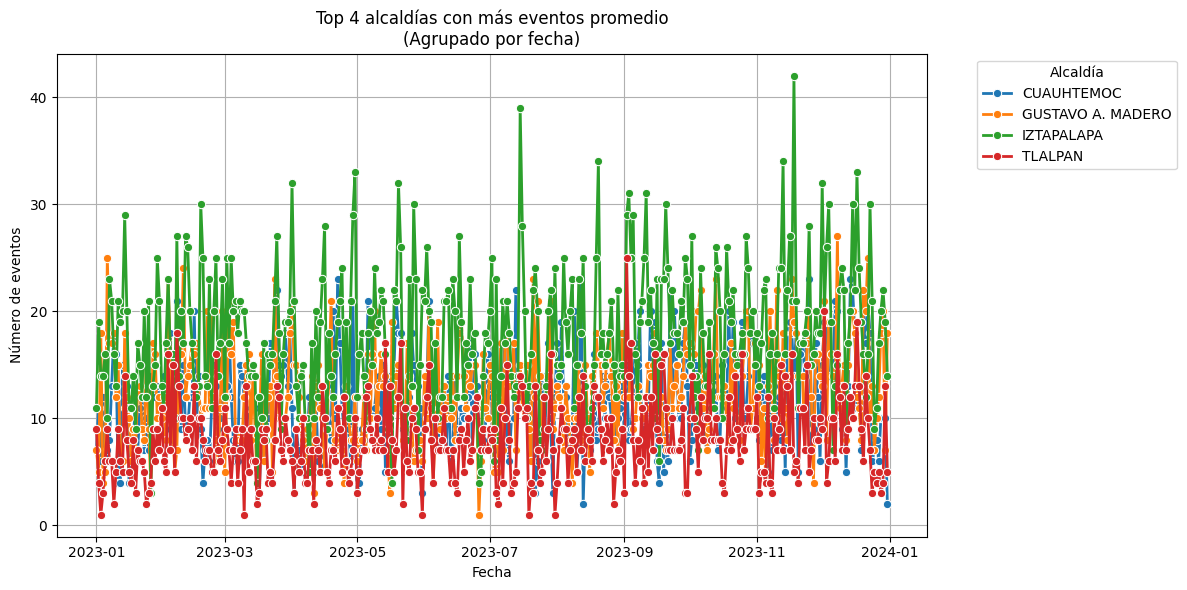

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=conteo_top4,
    x='fecha_creacion',
    y='conteo',
    hue='alcaldia_inicio',
    marker='o',  # Puntos marcados
    linewidth=2
)
plt.title('Top 4 alcaldías con más eventos promedio\n(Agrupado por fecha)')
plt.xlabel('Fecha')
plt.ylabel('Número de eventos')
plt.legend(title='Alcaldía', bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

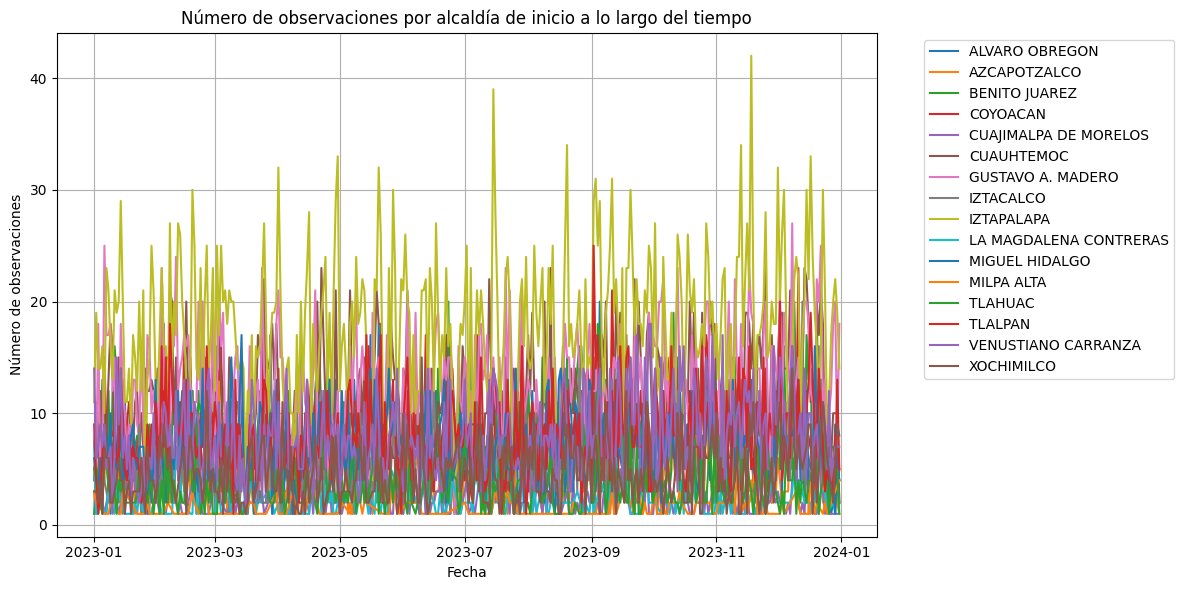

In [ ]:
conteo_por_alcaldia_fecha = df_completo1.groupby(['alcaldia_inicio', 'fecha_creacion']).size().reset_index(name='conteo')
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for alcaldia in conteo_por_alcaldia_fecha['alcaldia_inicio'].unique():
    datos = conteo_por_alcaldia_fecha[conteo_por_alcaldia_fecha['alcaldia_inicio'] == alcaldia]
    plt.plot(datos['fecha_creacion'], datos['conteo'], label=alcaldia)

plt.title('Número de observaciones por alcaldía de inicio a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Número de observaciones')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

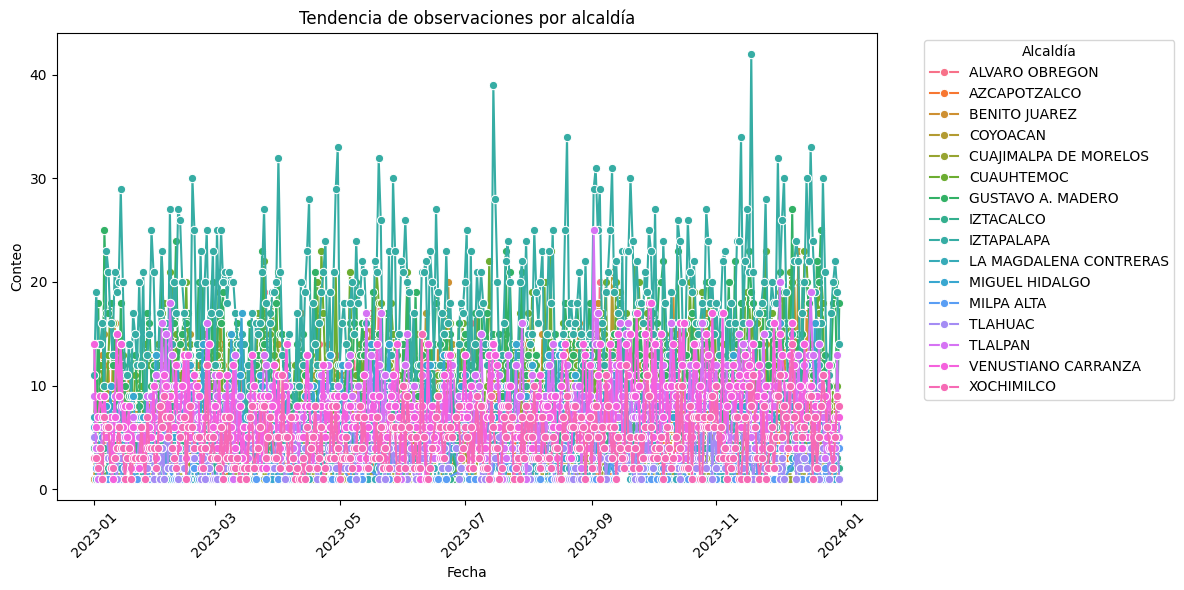

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=conteo_por_alcaldia_fecha,
    x='fecha_creacion',
    y='conteo',
    hue='alcaldia_inicio',
    marker='o'
)
plt.title('Tendencia de observaciones por alcaldía')
plt.xlabel('Fecha')
plt.ylabel('Conteo')
plt.xticks(rotation=45)
plt.legend(title='Alcaldía', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

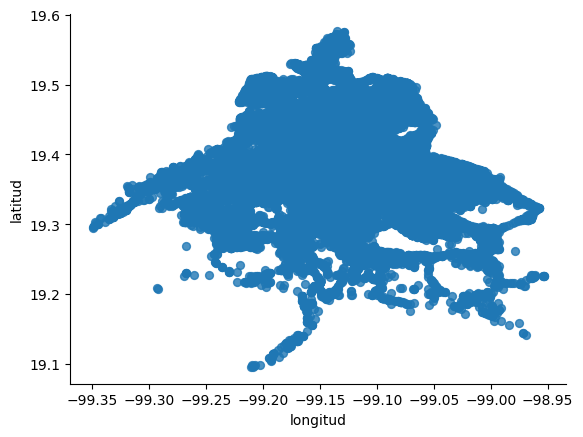

In [ ]:
from matplotlib import pyplot as plt
df_completo1.plot(kind='scatter', x='longitud', y='latitud', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

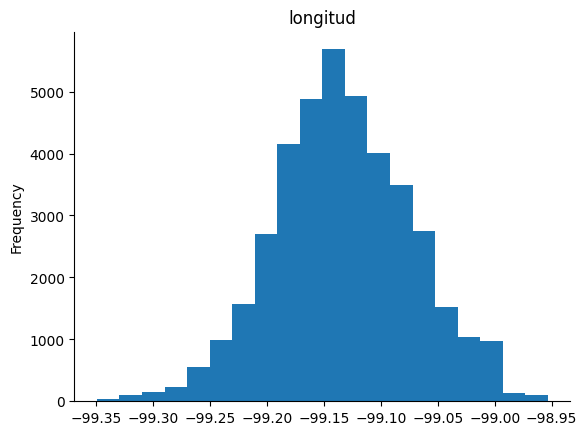

In [ ]:
from matplotlib import pyplot as plt
df_completo1['longitud'].plot(kind='hist', bins=20, title='longitud')
plt.gca().spines[['top', 'right',]].set_visible(False)

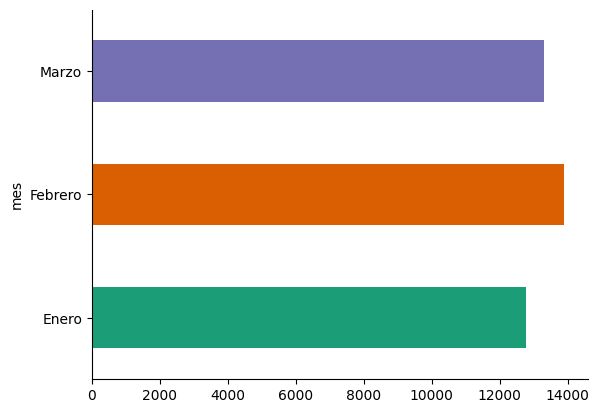

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df_completo1.groupby('mes').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
df_completo1['urgenciamed'].plot(kind='line', figsize=(8, 4), title='urgenciamed')
plt.gca().spines[['top', 'right']].set_visible(False)

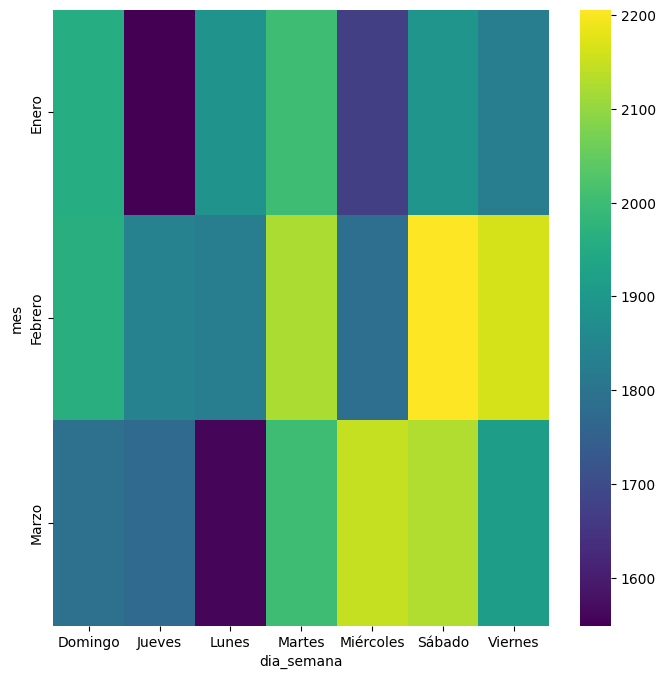

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['mes'].value_counts()
    for x_label, grp in df_completo1.groupby('dia_semana')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('dia_semana')
_ = plt.ylabel('mes')

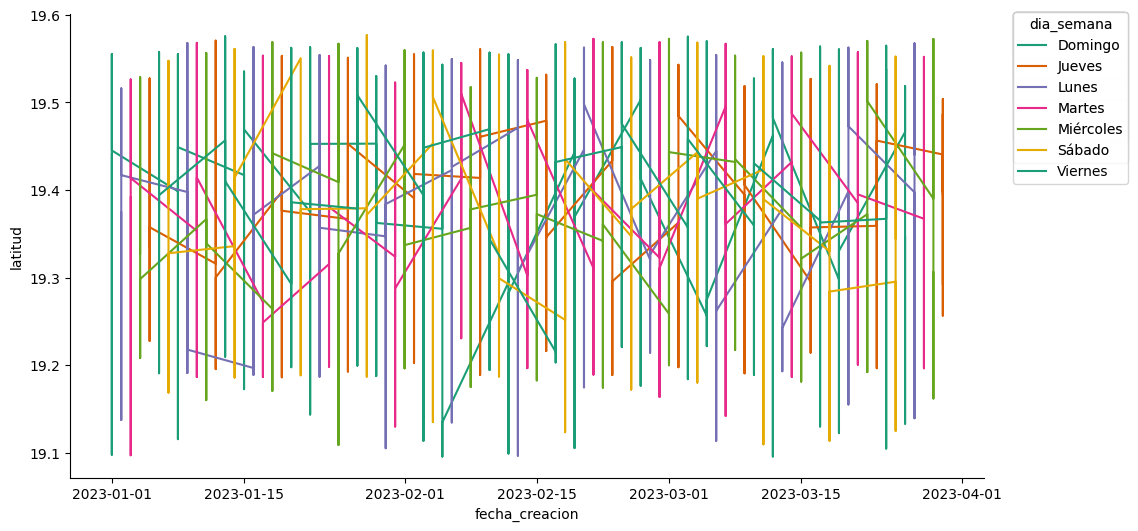

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['fecha_creacion']
  ys = series['latitud']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_completo1.sort_values('fecha_creacion', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('dia_semana')):
  _plot_series(series, series_name, i)
  fig.legend(title='dia_semana', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('fecha_creacion')
_ = plt.ylabel('latitud')

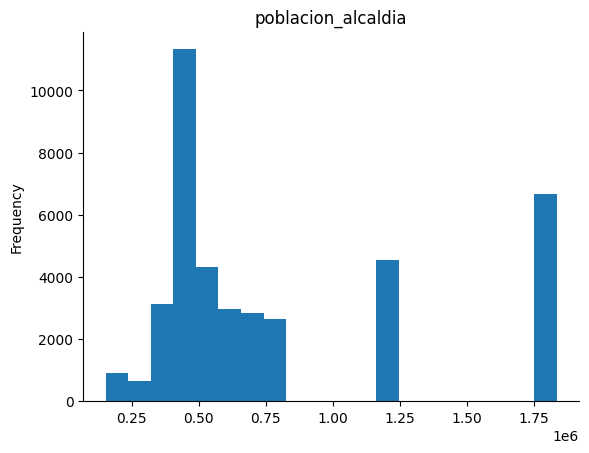

In [ ]:
from matplotlib import pyplot as plt
df_completo1['poblacion_alcaldia'].plot(kind='hist', bins=20, title='poblacion_alcaldia')
plt.gca().spines[['top', 'right',]].set_visible(False)

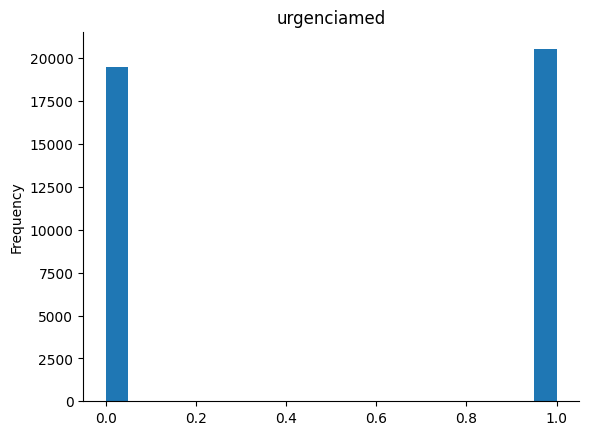

In [ ]:
from matplotlib import pyplot as plt
df_completo1['urgenciamed'].plot(kind='hist', bins=20, title='urgenciamed')
plt.gca().spines[['top', 'right',]].set_visible(False)

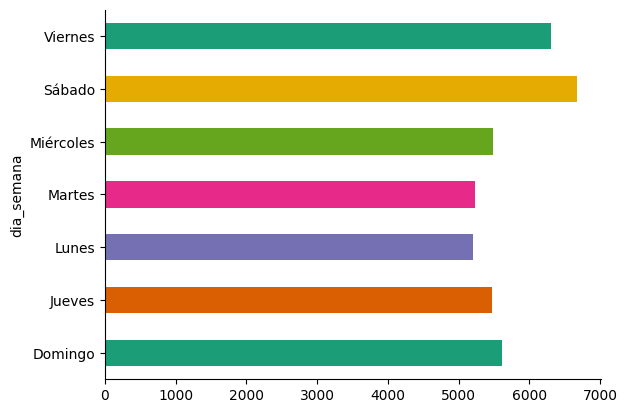

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df_completo1.groupby('dia_semana').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

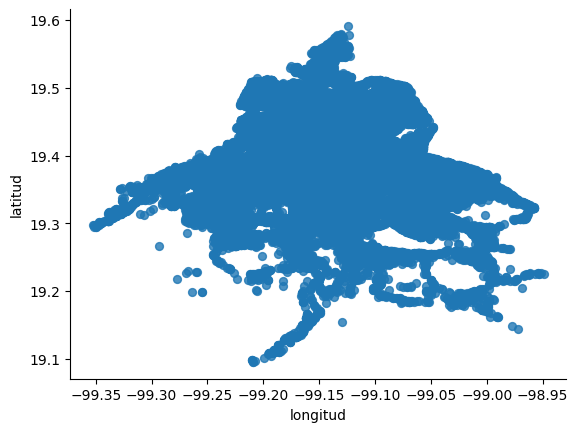

In [ ]:
from matplotlib import pyplot as plt
df_completo1.plot(kind='scatter', x='longitud', y='latitud', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df_completo1 = df_completo1.dropna()
# Convertir variables categóricas a códigos numéricos
df_completo1['dia_semana'] = df_completo1['dia_semana'].astype('category').cat.codes
df_completo1['alcaldia_inicio'] = df_completo1['alcaldia_inicio'].astype('category').cat.codes
df_completo1.drop(['fecha_creacion','colonia_catalogo','fecha_hora_creacion','fecha_hora_cierre', 'Alcaldía', 'anio','mes'], axis=1, inplace=True)


<ipython-input-9-932dddc5bfe8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_completo1['dia_semana'] = df_completo1['dia_semana'].astype('category').cat.codes
<ipython-input-9-932dddc5bfe8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_completo1['alcaldia_inicio'] = df_completo1['alcaldia_inicio'].astype('category').cat.codes
<ipython-input-9-932dddc5bfe8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://

In [ ]:
df_completo1 = pd.get_dummies(df_completo1, columns=['dia_semana'], drop_first=False)
print(df_completo1.info())
df_completo1

<class 'pandas.core.frame.DataFrame'>
Index: 35763 entries, 252172 to 235097
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   alcaldia_inicio     35763 non-null  int8   
 1   longitud            35763 non-null  float64
 2   latitud             35763 non-null  float64
 3   urgenciamed         35763 non-null  float64
 4   poblacion_alcaldia  35763 non-null  float64
 5   línea 1             35763 non-null  float64
 6   línea 2             35763 non-null  float64
 7   línea 3             35763 non-null  float64
 8   línea 4             35763 non-null  float64
 9   línea 5             35763 non-null  float64
 10  línea 6             35763 non-null  float64
 11  línea 7             35763 non-null  float64
 12  PRECIPcuahutemoc    35763 non-null  float64
 13  PRECIPtacubaya      35763 non-null  float64
 14  PRECIPgam           35763 non-null  float64
 15  PRECIPTlalpan       35763 non-null  float64
 16  dia

alcaldia_inicio   longitud    latitud  urgenciamed  \
252172                1 -99.157080  19.464015          0.0   
307232               10 -99.185117  19.399412          0.0   
262557               10 -99.189056  19.401508          0.0   
400284               11 -98.993430  19.217130          0.0   
430363               14 -99.066350  19.426320          0.0   
...                 ...        ...        ...          ...   
241129                3 -99.149210  19.315980          1.0   
413637                8 -99.021473  19.366617          0.0   
305239                2 -99.153620  19.398300          1.0   
383897                5 -99.149631  19.406998          1.0   
235097                5 -99.162579  19.459614          1.0   

        poblacion_alcaldia   línea 1   línea 2   línea 3   línea 4   línea 5  \
252172            432205.0  451083.0  230254.0  175292.0  109285.0  264664.0   
307232            414470.0  451158.0  236209.0  184283.0  111657.0  267244.0   
262557            414470.0  475000.0  229888.0  185492.0  113794.0  276296.0   
400284            152685.0  461025.0  247589.0  174130.0  113077.0  275890.0   
430363            443704.0  488295.0  261465.0  198142.0  109192.0  300724.0   
...                    ...       ...       ...       ...       ...       ...   
241129            614447.0  435726.0  209273.0  162219.0  105078.0  257342.0   
413637           1835486.0  516518.0  266029.0  215811.0  120894.0  280816.0   
305239            434153.0  302775.0  142996.0  129241.0  113114.0  181502.0   
383897            545884.0  279882.0  161243.0  145124.0  118671.0  184184.0   
235097            545884.0   96851.0   54964.0   45541.0   29900.0   82824.0   

        ...  PRECIPtacubaya  PRECIPgam  PRECIPTlalpan  dia_semana_0  \
252172  ...             0.0        0.0           0.00         False   
307232  ...             0.0        0.0           0.00         False   
262557  ...             0.0        0.0           0.00         False   
400284  ...             0.0        0.0           0.01         False   
430363  ...             0.0        0.0           0.00         False   
...     ...             ...        ...            ...           ...   
241129  ...             0.2        0.0           0.00         False   
413637  ...             0.0        0.7           0.00         False   
305239  ...             0.0        0.0           0.00         False   
383897  ...             6.2        2.0           0.01         False   
235097  ...             0.0        0.0           0.00          True   

        dia_semana_1  dia_semana_2  dia_semana_3  dia_semana_4  dia_semana_5  \
252172         False         False         False          True         False   
307232         False         False          True         False         False   
262557         False         False         False         False         False   
400284         False          True         False         False         False   
430363         False         False         False          True         False   
...              ...           ...           ...           ...           ...   
241129          True         False         False         False         False   
413637         False         False         False         False         False   
305239         False         False         False         False          True   
383897         False         False         False         False          True   
235097         False         False         False         False         False   

        dia_semana_6  
252172         False  
307232         False  
262557          True  
400284         False  
430363         False  
...              ...  
241129         False  
413637          True  
305239         False  
383897         False  
235097         False  

[35763 rows x 23 columns]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Lista de columnas a normalizar
cols_to_normalize = [
    'poblacion_alcaldia', 'línea 1', 'línea 2', 'línea 3', 'línea 4',
    'línea 5', 'línea 6', 'línea 7',
    'PRECIPcuahutemoc', 'PRECIPtacubaya', 'PRECIPgam', 'PRECIPTlalpan'
]

# Inicializar el escalador
scaler = MinMaxScaler()

# Aplicar normalización
df_completo1[cols_to_normalize] = scaler.fit_transform(df_completo1[cols_to_normalize])
df_completo1

alcaldia_inicio   longitud    latitud  urgenciamed  \
252172                1 -99.157080  19.464015          0.0   
307232               10 -99.185117  19.399412          0.0   
262557               10 -99.189056  19.401508          0.0   
400284               11 -98.993430  19.217130          0.0   
430363               14 -99.066350  19.426320          0.0   
...                 ...        ...        ...          ...   
241129                3 -99.149210  19.315980          1.0   
413637                8 -99.021473  19.366617          0.0   
305239                2 -99.153620  19.398300          1.0   
383897                5 -99.149631  19.406998          1.0   
235097                5 -99.162579  19.459614          1.0   

        poblacion_alcaldia   línea 1   línea 2   línea 3   línea 4   línea 5  \
252172            0.166104  0.773328  0.700835  0.749806  0.827850  0.823454   
307232            0.155565  0.773491  0.724644  0.801764  0.852586  0.835137   
262557            0.155565  0.825541  0.699371  0.808750  0.874871  0.876129   
400284            0.000000  0.795032  0.770143  0.743091  0.867394  0.874290   
430363            0.172937  0.854566  0.825621  0.881852  0.826880  0.986750   
...                    ...       ...       ...       ...       ...       ...   
241129            0.274401  0.739802  0.616950  0.674260  0.783978  0.790296   
413637            1.000000  0.916179  0.843868  0.983958  0.948912  0.896597   
305239            0.167262  0.449555  0.351965  0.483686  0.867780  0.446859   
383897            0.233657  0.399577  0.424919  0.575471  0.925730  0.459004   
235097            0.233657  0.000000  0.000000  0.000000  0.000000  0.000000   

        ...  PRECIPtacubaya  PRECIPgam  PRECIPTlalpan  dia_semana_0  \
252172  ...        0.000000   0.000000       0.000000         False   
307232  ...        0.000000   0.000000       0.000000         False   
262557  ...        0.000000   0.000000       0.000000         False   
400284  ...        0.000000   0.000000       0.000461         False   
430363  ...        0.000000   0.000000       0.000000         False   
...     ...             ...        ...            ...           ...   
241129  ...        0.007092   0.000000       0.000000         False   
413637  ...        0.000000   0.019663       0.000000         False   
305239  ...        0.000000   0.000000       0.000000         False   
383897  ...        0.219858   0.056180       0.000461         False   
235097  ...        0.000000   0.000000       0.000000          True   

        dia_semana_1  dia_semana_2  dia_semana_3  dia_semana_4  dia_semana_5  \
252172         False         False         False          True         False   
307232         False         False          True         False         False   
262557         False         False         False         False         False   
400284         False          True         False         False         False   
430363         False         False         False          True         False   
...              ...           ...           ...           ...           ...   
241129          True         False         False         False         False   
413637         False         False         False         False         False   
305239         False         False         False         False          True   
383897         False         False         False         False          True   
235097         False         False         False         False         False   

        dia_semana_6  
252172         False  
307232         False  
262557          True  
400284         False  
430363         False  
...              ...  
241129         False  
413637          True  
305239         False  
383897         False  
235097         False  

[35763 rows x 23 columns]

In [ ]:
import pymc as pm
import numpy as np

with pm.Model() as modelo:

    # Intercepto
    alpha = pm.Normal("alpha", mu=0, sigma=1)

    # Coeficientes para líneas del metrobus
    beta_l = [
        pm.Normal(f"beta_l{i+1}", mu=0, sigma=2)
        for i in range(7)
    ]

    # Coeficientes para precipitación
    beta_p = [
        pm.Normal(f"beta_p{i+1}", mu=0, sigma=1.5)
        for i in range(4)
    ]

    # Coeficiente para población
    beta_pob = pm.Normal("beta_pob", mu=0, sigma=3)

    # Coeficientes para días de la semana
    beta_d = [
        pm.Normal(f"beta_d{i}", mu=0, sigma=1)
        for i in range(7)
    ]

    # Lineal predictor
    logits = (
        alpha
        + beta_pob * df_completo1["poblacion_alcaldia"]
        + sum(beta_l[i] * df_completo1[f"línea {i+1}"] for i in range(7))
        + sum(beta_p[i] * df_completo1[f"PRECIP{n}" ] for i, n in enumerate(["cuahutemoc", "tacubaya", "gam"]))
        + sum(beta_d[i] * df_completo1[f"dia_semana_{i}"] for i in range(7))
    )

    # Probabilidad
    p = pm.Deterministic("p", pm.math.sigmoid(logits))

    # Verosimilitud
    y_obs = pm.Bernoulli("y_obs", p=p, observed=df_completo1["urgenciamed"])

    # Muestreo
    trace = pm.sample(draws=1000, tune=500, target_accept=0.9)

Output()

In [ ]:
import arviz as az

az.summary(trace, var_names=[
    "alpha",
    "beta_pob",
    "beta_l1", "beta_l2", "beta_l3", "beta_l4", "beta_l5", "beta_l6",
    "beta_p1", "beta_p2", "beta_p3",
    "beta_d0", "beta_d1", "beta_d2", "beta_d3", "beta_d4", "beta_d5", "beta_d6",
])

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha     0.276  0.367  -0.482    0.898      0.021    0.010     317.0   
beta_pob  0.030  0.036  -0.039    0.095      0.001    0.001    2504.0   
beta_l1  -0.583  0.275  -1.097   -0.071      0.007    0.006    1710.0   
beta_l2  -0.021  0.255  -0.531    0.449      0.006    0.006    1882.0   
beta_l3   0.311  0.201  -0.067    0.680      0.004    0.004    2329.0   
beta_l4   0.057  0.133  -0.196    0.299      0.003    0.003    2086.0   
beta_l5   0.349  0.247  -0.099    0.818      0.006    0.005    1481.0   
beta_l6  -0.351  0.187  -0.713   -0.015      0.005    0.004    1278.0   
beta_p1  -0.012  0.102  -0.208    0.170      0.002    0.002    2174.0   
beta_p2  -0.077  0.083  -0.230    0.079      0.002    0.002    1895.0   
beta_p3  -0.153  0.104  -0.352    0.030      0.002    0.002    2366.0   
beta_d0   0.023  0.362  -0.578    0.782      0.020    0.010     315.0   
beta_d1   0.041  0.364  -0.649    0.725      0.021    0.011     312.0   
beta_d2   0.080  0.363  -0.574    0.772      0.021    0.011     314.0   
beta_d3  -0.047  0.364  -0.713    0.634      0.021    0.011     311.0   
beta_d4  -0.020  0.364  -0.702    0.657      0.021    0.011     311.0   
beta_d5  -0.005  0.364  -0.671    0.700      0.020    0.010     318.0   
beta_d6   0.026  0.364  -0.639    0.725      0.021    0.011     311.0   

          ess_tail  r_hat  
alpha        435.0   1.00  
beta_pob    1526.0   1.01  
beta_l1     1246.0   1.00  
beta_l2     1538.0   1.00  
beta_l3     1334.0   1.00  
beta_l4     1407.0   1.00  
beta_l5     1507.0   1.00  
beta_l6     1201.0   1.00  
beta_p1     1674.0   1.00  
beta_p2     1213.0   1.00  
beta_p3     1462.0   1.00  
beta_d0      476.0   1.00  
beta_d1      361.0   1.00  
beta_d2      403.0   1.00  
beta_d3      464.0   1.00  
beta_d4      407.0   1.00  
beta_d5      446.0   1.00  
beta_d6      403.0   1.00